# **Digital Evolution in Great Britain: Insights into Internet Penetration, User Behaviors, and Trust from 2015-2020**

## **Project Overview**

Our journey in this project immerses us in the intricate fabric of internet engagement in Great Britain, spanning an impactful half-decade from 2015 to 2020. With a spotlight on facets like adoption rates, frequency matrices, the mosaic of online activities, and demographic-driven variances, our goal is to craft a detailed panorama of Britain's digital metamorphosis over the observed period.

## **Data Genesis**

A vital foundation of our analytical endeavor is the datasets sourced from the Office for National Statistics (ONS) - specifically, the "Internet access - households and individuals" datasets. Recognized as a trusted National Statistic, this resource offers us annual glimpses into Great Britain's digital footprints, paving the way for insights into diverse internet activities, shopping dynamics, and beyond.

## **Introduction**

The internet has become an integral facet of modern life, influencing everything from communication to commerce. As we usher in an era dominated by digital interactions, understanding how people interact with the web is crucial. This project offers a deep dive into the evolution of internet usage in Great Britain, examining the nuances of online behavior, user preferences, and emerging trends. By synthesizing data across multiple years, we aim to unravel the broader narrative of the digital transformation in Great Britain, highlighting significant milestones and identifying potential areas of focus for businesses, policymakers, and other stakeholders.

## **Scope of this Notebook**

In this initial Jupyter notebook, our focus will predominantly reside in the realms of data amalgamation and purification. Recognizing that robust analysis necessitates pristine data, our immediate steps will involve merging datasets, rectifying inconsistencies, handling missing values, and ensuring a seamless dataset that is primed for subsequent in-depth analyses.

## **Tables in Focus**
To ensure an exhaustive analysis, we have incorporated data from several tables, as detailed below:

**1. Households with Internet Access (1998 to 2020)** 
- This table sheds light on the percentage of households equipped with internet access over the years.

**2. Frequency of Internet Use (2006 to 2020)**
- Here, we delve into the regularity of internet usage, discerning how often individuals turn to the web.

**3. Internet Activities (2007 to 2020)**
- This table spotlights the multifarious activities individuals undertake while online.

**4. Shopping Online by Age, Sex, and Disability Status (2008 to 2020)**
- This table grants us insights into the demographic intricacies of online shopping behaviors.

## **Importing Required Libraries and Setting up File Paths**

In [1]:
import pandas as pd

# File paths
files = {
    "2015": "internetaccesspublicationtables2015.xls",
    "2016": "internetaccesspublicationtables2016.xls",
    "2017": "internetaccesspublicationtables2017.xls",
    "2018": "internetaccesspublicationtables2018.xls",
    "2019": "internetaccesspublicationtables2019.xlsx",
    "2020": "internetaccesspublicationtables2020.xlsx"
}

# Importing the files into a dictionary of DataFrames
data = {}
for year, file in files.items():
    data[year] = pd.read_excel(file, engine='openpyxl' if file.endswith('.xlsx') else 'xlrd')

# Now, data["2015"] will contain the dataset for 2015 and so on


## **Initial Exploration**

In [2]:
# Create an ExcelFile object for the 2020 file
xlsx = pd.ExcelFile("internetaccesspublicationtables2020.xlsx")

# Get the sheet names from the ExcelFile object
sheet_names_2020 = xlsx.sheet_names
print(sheet_names_2020)


['Index', '1', '2', '3', '4', '5', '6', '7', '8', '9, 10', '11', '12', '13', '14', '15', '16', '17', '18', '19, 20', '21', '22', '23', '24', '25', '26']


## **Analyzing and Cleaning Specific Tables**

### **1.Households with Internet Access (1998 to 2020)**

**A Digital Era Unveiled**

Over the past few decades, the internet has evolved from a novelty to a necessity. But how rapid was its adoption among the households in Great Britain? The following analysis unravels the progression of internet adoption from 1998 to 2020, providing insights into the growing digital footprint of the nation.

In [3]:
from IPython.display import display, HTML

# Extract data from the '1' sheet for the 2020 file
table_1_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='1')

# Extracting the relevant rows and columns
table_1_cleaned = table_1_2020.iloc[4:27, 1:3].copy()

# Renaming the columns
table_1_cleaned.columns = ["Year", "Percentage of Households with Internet Access"]

# Displaying the cleaned data in table format
table_1_cleaned.reset_index(drop=True, inplace=True)
display(HTML('<h2>Households with Internet Access (1998 to 2020)</h2>'))

display(table_1_cleaned)



Year Percentage of Households with Internet Access
0   1998                                             9
1   1999                                            13
2   2000                                            25
3   2001                                            36
4   2002                                            42
5   2003                                            46
6   2004                                            49
7   2005                                            55
8   2006                                            57
9   2007                                            61
10  2008                                            65
11  2009                                            70
12  2010                                            73
13  2011                                            77
14  2012                                            80
15  2013                                            83
16  2014                                            84
17  2015                                            86
18  2016                                            89
19  2017                                            90
20  2018                                            90
21  2019                                            93
22  2020                                            96

**Code for Data Extraction and Displaying the Table**

In [4]:
!pip install plotly

In [5]:
import pandas as pd
import plotly.express as px

# File path
file_path = "internetaccesspublicationtables2020.xlsx"

# Load data from the specific sheet related to "Households with Internet Access"
table_1 = pd.read_excel(file_path, sheet_name='1', engine='openpyxl')

# Cleaning the data
table_1_cleaned = table_1.iloc[4:27, 1:3].copy()
table_1_cleaned.columns = ["Year", "Percentage of Households with Internet Access"]
table_1_cleaned.reset_index(drop=True, inplace=True)

# Visualization with Plotly
fig = px.line(table_1_cleaned, x='Year', y='Percentage of Households with Internet Access', 
              title='Households with Internet Access (1998 to 2020)',
              markers=True)

# Show figure
fig.show()


- The data reveals a consistent upward trend in internet access among households in Great Britain from 1998 to 2020.
- Starting from just 9% in 1998, there was a remarkable leap to 96% by 2020.

### **2. Frequency of Internet Use (2006 to 2020)**

**Navigating the Digital Habits of Great Britain**

The way in which individuals interact with the internet can reveal much about the evolving digital culture. While having access to the internet is one metric, understanding the frequency of use provides insights into how integral the internet has become in daily lives. This section analyses the frequency of internet usage from 2006 to 2020, categorizing users based on their online habits.

In [6]:
from IPython.display import display, HTML
import pandas as pd

# Extract data from the '3' sheet for the 2020 file
table_3_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='3')

# Removing rows with NaN values in the 'Year' column
table_3_2020_cleaned = table_3_2020[table_3_2020['Unnamed: 1'].notna()]

# Selecting relevant columns
table_3_2020_cleaned = table_3_2020_cleaned[['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Unnamed: 12']]

# Renaming the columns for clarity
table_3_2020_cleaned.columns = ['Year', 'Daily or almost every day (%)', 'At least weekly but not daily (%)', 'Less than weekly (%)', 'Did not use in the last 3 months (%)']

# Setting 'Year' as the index
table_3_2020_cleaned.set_index('Year', inplace=True)

# Filtering out rows with non-numeric data in the 'Year' column
table_3_2020_cleaned = table_3_2020_cleaned[pd.to_numeric(table_3_2020_cleaned.index, errors='coerce').notna()]

# Display the cleaned table as an HTML table
display(HTML('<h2>Frequency of Internet Use (2006 to 2020)</h2>'))

display(HTML(table_3_2020_cleaned.to_html()))


In [7]:
import plotly.graph_objects as go

# Creating the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=table_1_cleaned['Year'], 
                         y=table_1_cleaned['Percentage of Households with Internet Access'],
                         mode='lines+markers',
                         name='Percentage of Households'))

# Adding title and labels
fig.update_layout(title='Households with Internet Access (1998 to 2020)',
                  xaxis_title='Year',
                  yaxis_title='Percentage of Households with Internet Access (%)')

fig.show()


In [8]:
# Plotting the data
fig = go.Figure()

# Adding traces for each frequency category
for col in table_3_2020_cleaned.columns:
    fig.add_trace(go.Scatter(x=table_3_2020_cleaned.index, 
                             y=table_3_2020_cleaned[col],
                             mode='lines+markers',
                             name=col))

# Adding title and labels
fig.update_layout(title='Frequency of Internet Use (2006 to 2020)',
                  xaxis_title='Year',
                  yaxis_title='Percentage of Users (%)')

fig.show()


- There's a clear trend indicating an increase in daily internet users over the years, mirroring the rise of digital-dependency in daily tasks, entertainment, and work.

### **3. Internet activities (2007 to 2020)**

In [9]:
from IPython.display import display
import pandas as pd

# Extract data from the '5' sheet for the 2020 file
table_5_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='5')

# Drop rows and columns with all NaN values
table_5_2020.dropna(how='all', inplace=True)
table_5_2020.dropna(how='all', axis=1, inplace=True)

# Extract the years for the column names
years = ['Activities'] + table_5_2020.iloc[2, 1:].tolist()

# Drop the rows that don't contain the main data
table_5_2020 = table_5_2020.iloc[3:-2, :]

# Rename columns
table_5_2020.columns = years

# Set 'Activities' as the index
table_5_2020.set_index('Activities', inplace=True)

# Display the cleaned table
# Display the cleaned table as an HTML table
display(HTML('<h2>Internet activities (2007 to 2020)</h2>'))

display(table_5_2020)


2007 2008 2009 2010 2011  \
Activities                                                                    
Sending/receiving emails                             57   62   68   69    :   
Finding information about goods or services          58   59   59   58   62   
Internet banking                                     30   35   41   42   44   
Using instant messaging services (eg Skype or W...    :    :    :    :    :   
Social networking (eg Facebook or Twitter)            :    :    :    :   45   
Reading online news, newspapers or magazines         20   34   39   39   42   
Watching video content from sharing services su...    :    :    :    :    :   
Listening to or downloading music                     :    :    :    :    :   
Looking for health-related information (eg inju...   18   24   32   30   34   
Watching internet streamed live or catch-up TV        :    :    :    :    :   
Watching Video on Demand from commercial services     :    :    :    :    :   
Making video or voice calls over the internet (...    8    :   16   18   17   
Playing or downloading games                          :    :    :    :    :   
Selling goods or services over the internet          12   13   14   16   25   
Making an appointment with a medical practition...    :    :    :    :    :   
Using other online health services via a websit...    :    :    :    :    :   
Accessing personal health records online              :    :    :    :    :   
Listening to music                                    :    :    :    :    :   

                                                   2012 2013 2014 2015 2016  \
Activities                                                                    
Sending/receiving emails                             73   75   75   75   79   
Finding information about goods or services          67   66   73   70   76   
Internet banking                                     47   50   53   55   60   
Using instant messaging services (eg Skype or W...    :    :    :    :    :   
Social networking (eg Facebook or Twitter)           48   53   54   57   63   
Reading online news, newspapers or magazines         47   55   55   61   60   
Watching video content from sharing services su...    :    :    :    :   47   
Listening to or downloading music                     :    :    :    :    :   
Looking for health-related information (eg inju...    :   43    :   48   51   
Watching internet streamed live or catch-up TV        :    :    :    :   43   
Watching Video on Demand from commercial services     :    :    :    :   29   
Making video or voice calls over the internet (...   32   25    :   36   43   
Playing or downloading games                          :    :    :    :   32   
Selling goods or services over the internet          22   28   23   21   18   
Making an appointment with a medical practition...   10    :   10    :   15   
Using other online health services via a websit...    :    :    :    :    :   
Accessing personal health records online              :    :    :    :    :   
Listening to music                                    :    :    :    :   49   

                                                   2017 2018 2019 2020  
Activities                                                              
Sending/receiving emails                             82   84   86   85  
Finding information about goods or services          71   77   78   81  
Internet banking                                     63   69   73   76  
Using instant messaging services (eg Skype or W...    :    :   72   71  
Social networking (eg Facebook or Twitter)           66   65   68   70  
Reading online news, newspapers or magazines         64    :   66   70  
Watching video content from sharing services su...    :   62    :   66  
Listening to or downloading music                     :    :    :   62  
Looking for health-related information (eg inju...   53   54   63   60  
Watching internet streamed live or catch-up TV        :   56    :   59  
Watching Vide

In [10]:
import plotly.graph_objects as go

# Prepare the data
years = table_5_2020.columns.astype(str).tolist()
data = []

for activity, values in table_5_2020.iterrows():
    data.append(go.Scatter(x=years, y=values, name=activity, mode='lines+markers'))

# Create the figure
fig = go.Figure(data=data)

# Title and labels
fig.update_layout(title='Digital Activities in Great Britain (2007 to 2020)',
                  xaxis_title='Year',
                  yaxis_title='Percentage of Users (%)',
                  legend_title='Activities',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  width=1200, height=800,
                  margin=dict(l=50, r=250, b=50, t=100)
                 )

# Adjusting title position
fig.layout.title.y = 0.95
fig.layout.title.x = 0.5

# Adding annotations
annotations = []
for activity, row in table_5_2020.iterrows():
    last_year = row.last_valid_index()
    last_val = row[last_year]
    annotations.append(dict(xref='paper', x=1.05, y=last_val, xanchor='left', yanchor='middle',
                            text=activity, font=dict(family='Arial', size=12),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()


- **Steady Growth**: Activities like **'Sending/receiving emails'**, **'Finding information about goods or services'**, and **'Internet banking'** have shown a steady growth trend. This indicates that these activities have become fundamental to internet users in Great Britain.

- **Emergence of New Trends**: Some activities such as 'Watching Video on Demand from commercial services' and 'Making video or voice calls over the internet' have seen an increased adoption in recent years, pointing towards changing consumer preferences and the influence of technological advancements.

- **Health-related Activities**: There's a noticeable uptrend in health-related online activities such as 'Looking for health-related information' and more recently 'Using other online health services...'. Especially given the global health circumstances in 2020, there's a significant rise in users accessing health services online.

- **Potential Plateaus**: Some activities such as 'Social networking' have plateaued, perhaps indicating market saturation or a shift in users' preferences.

- **Decline in Specific Activities**: 'Selling goods or services over the internet' saw a peak in the mid-2010s but has since declined, potentially pointing towards specialized platforms taking over or a change in users' online selling behaviors.

**Digital Activities in Great Britain (2007 to 2020): Key Takeaways**
    
Fundamentals Stand Strong: Core online activities such as email, searching for goods/services, and internet banking have witnessed steady growth, reinforcing their status as staple online tasks.

Adaptation to Modern Tech: With the advent and accessibility of better internet speeds and tech, there's been a clear uptick in activities like video calls, streaming, and online gaming.

Health in the Digital Era: Online health-related tasks have gained traction, especially in recent years. With the convenience of online consultations, prescription access, and information gathering, users are increasingly turning to the internet for health solutions.

Changing Social Dynamics: While social networking remains popular, its growth seems to have stabilized. This could be due to market saturation or users branching out to newer platforms or forms of digital interaction.

E-Commerce Evolution: The dynamics of selling online have evolved. Direct selling might have seen a dip, but it could be attributed to the rise of specialized platforms that cater to sellers' needs.

### **4. Shopping online, by age group, sex and disability status (2008 to 2020)**


In [11]:
from IPython.display import display, HTML
import pandas as pd

# Load the data from the '8' sheet
table_8_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='8')

# Drop rows with all NaN values
table_8_2020.dropna(how='all', inplace=True)

# Setting the first row as header and dropping it from main data
table_8_2020.columns = table_8_2020.iloc[2]
table_8_2020 = table_8_2020.drop(table_8_2020.index[0:3])

# Drop rows and columns that are all NaN
table_8_2020.dropna(how='all', axis=1, inplace=True)
table_8_2020.dropna(how='all', inplace=True)

# Rename the 'Year' column to something more descriptive
table_8_2020 = table_8_2020.rename(columns={"Year": "Demographics"})

# Reset the index
table_8_2020.reset_index(drop=True, inplace=True)

# Drop unnecessary rows
table_8_2020 = table_8_2020.drop([3, 12, 13, 14, 15], axis=0)

# Adjust the column names
table_8_2020.columns = ['Demographics', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

# Set 'Demographics' as the index
table_8_2020.set_index('Demographics', inplace=True)

# Display the title
display(HTML('<h2>Demographic Insights into Online Shopping Trends (2008 - 2020)</h2>'))

# Display the cleaned table
display(table_8_2020)

# Save the cleaned table to CSV
table_8_2020.to_csv('Online_Shopping_Trends_2008_2020.csv')


2008 2009 2010 2011 2012 2013 2014 2015  2016  2017  \
Demographics                                                                    
All                         53   61   62   66   67   72   74   74  77.0  77.0   
Men                         57   66   64   68   68   74   75   75  78.0  77.0   
Women                       49   57   60   63   67   70   72   74  77.0  76.0   
16-24                       65   78   74   77   79   86   83   88  89.0  88.0   
25-34                       72   82   79   88   87   92   90   88  93.0  89.0   
35-44                       68   75   78   79   84   83   88   89  87.0  91.0   
45-54                       59   65   70   73   72   77   81   80  86.0  84.0   
55-64                       45   52   58   59   61   67   70   68  77.0  75.0   
65+                         16   20   22   27   32   36   40   43  45.0  45.0   
Equality Act disabled1       :    :    :    :    :    :    :   56  58.0  57.0   
Not Equality Act disabled    :    :    :    :    :    :    :   80  82.0  83.0   

                           2018  2019 2020  
Demographics                                
All                        78.0  82.0   87  
Men                        78.0  83.0   87  
Women                      78.0  82.0   87  
16-24                      95.0  97.0   96  
25-34                      96.0  97.0   99  
35-44                      89.0  94.0   95  
45-54                      81.0  89.0   95  
55-64                      71.0  77.0   79  
65+                        48.0  54.0   65  
Equality Act disabled1     64.0  73.0   81  
Not Equality Act disabled  82.0  85.0   88

In [12]:
# Save table_8_2020 to a .csv file
table_8_2020.to_csv("Demographic Insights into Online Shopping Trends.csv")

In [13]:
display(table_8_2020.describe())


2016       2017       2018       2019
count  11.000000  11.000000  11.000000  11.000000
mean   77.181818  76.545455  78.181818  83.000000
std    14.112535  14.045381  13.797233  12.377399
min    45.000000  45.000000  48.000000  54.000000
25%    77.000000  75.500000  74.500000  79.500000
50%    78.000000  77.000000  78.000000  83.000000
75%    86.500000  86.000000  85.500000  91.500000
max    93.000000  91.000000  96.000000  97.000000

## **Deep Dive into Demographics**

- **Yearly Trends**

In this section, we'll visualize how online shopping as a whole has evolved from 2008 to 2020.

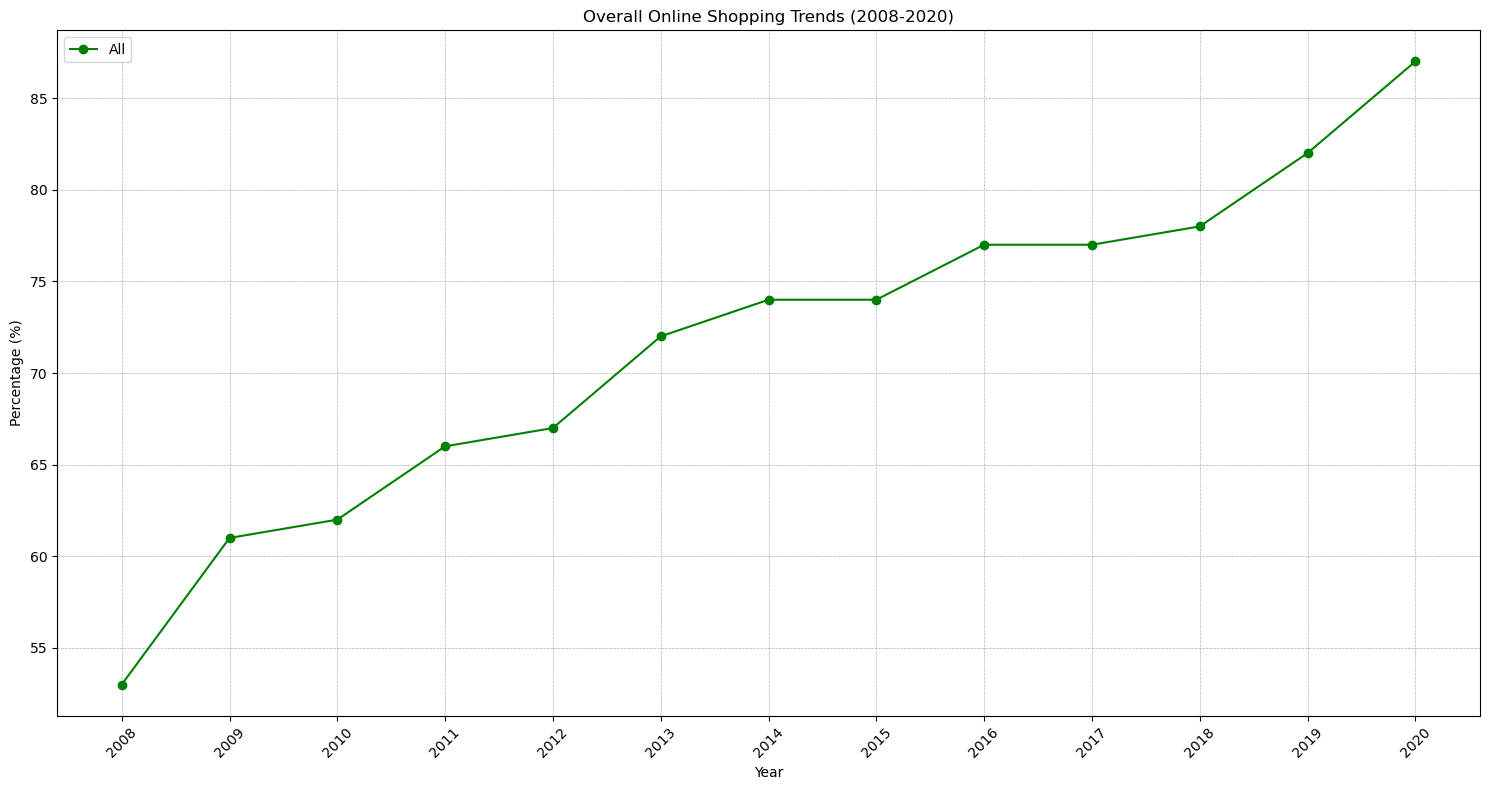

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(table_8_2020.columns, table_8_2020.loc['All'], label='All', color='green', marker='o')
    
plt.title("Overall Online Shopping Trends (2008-2020)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The overall online shopping trend from 2008 to 2020 has shown a consistent increase, reflecting the global shift towards e-commerce and digital solutions.

- **Online Shopping Trends by Age**

Firstly, we'll visualize the online shopping trends over the years by age groups.

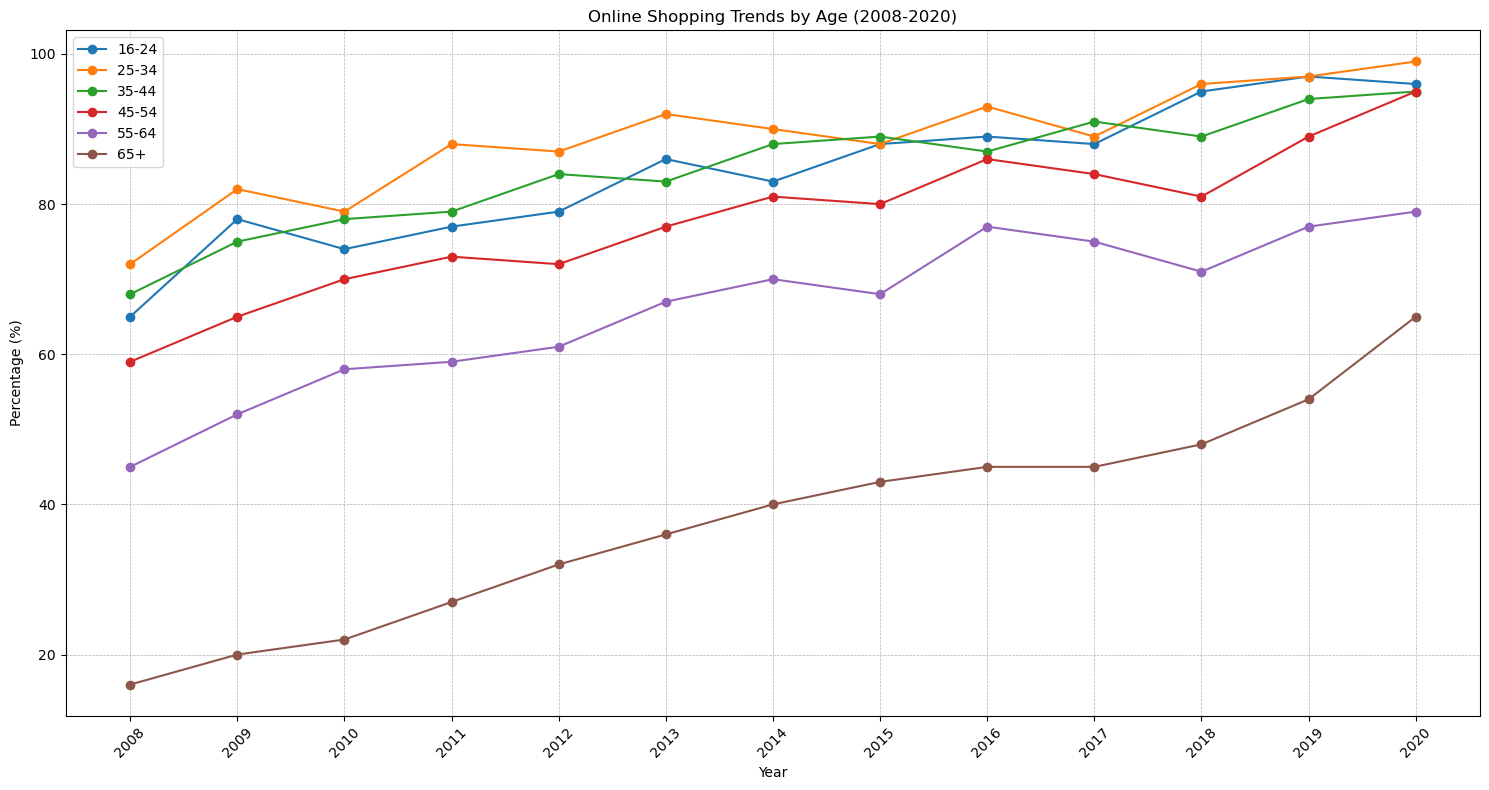

In [15]:
import matplotlib.pyplot as plt

# Extract age-specific demographics
age_demographics = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']

plt.figure(figsize=(15,8))
for age in age_demographics:
    plt.plot(table_8_2020.columns, table_8_2020.loc[age], label=age, marker='o')
    
plt.title("Online Shopping Trends by Age (2008-2020)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Younger age groups, particularly 16-34, consistently lead in online shopping. However, all age groups have shown growth, with the elderly (65+) demonstrating a significant surge in the latter years.

- **Online Shopping Trends by Gender**

We'll now compare the trends between Men and Women over the years.

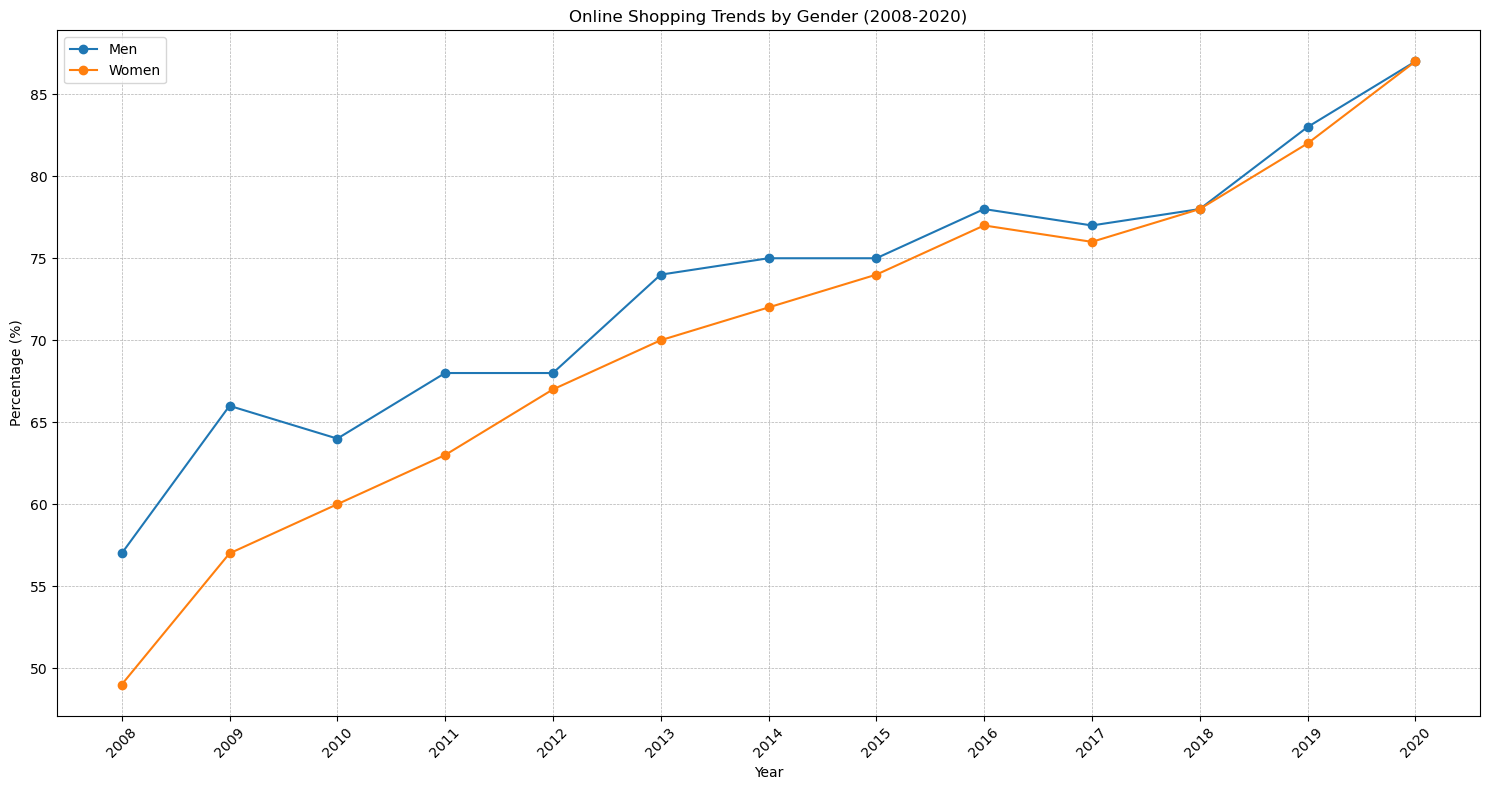

In [16]:
gender_demographics = ['Men', 'Women']

plt.figure(figsize=(15,8))
for gender in gender_demographics:
    plt.plot(table_8_2020.columns, table_8_2020.loc[gender], label=gender, marker='o')
    
plt.title("Online Shopping Trends by Gender (2008-2020)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Initially, men had a slight lead in online shopping, but over the years, the gender gap has narrowed, with both men and women exhibiting almost identical shopping habits by 2020.

## **Impact of Key Events**

While a detailed event-based analysis would require external data regarding global or regional events affecting shopping trends, the data clearly indicates a surge in recent years. Possible reasons could include the rise of e-commerce giants, ease of online payments, and events like the COVID-19 pandemic that pushed more people to shop online.

In [17]:
#Visualization:
#a. Line Plots for Trends over Years:
#This will show us how online shopping trends have changed over the years.

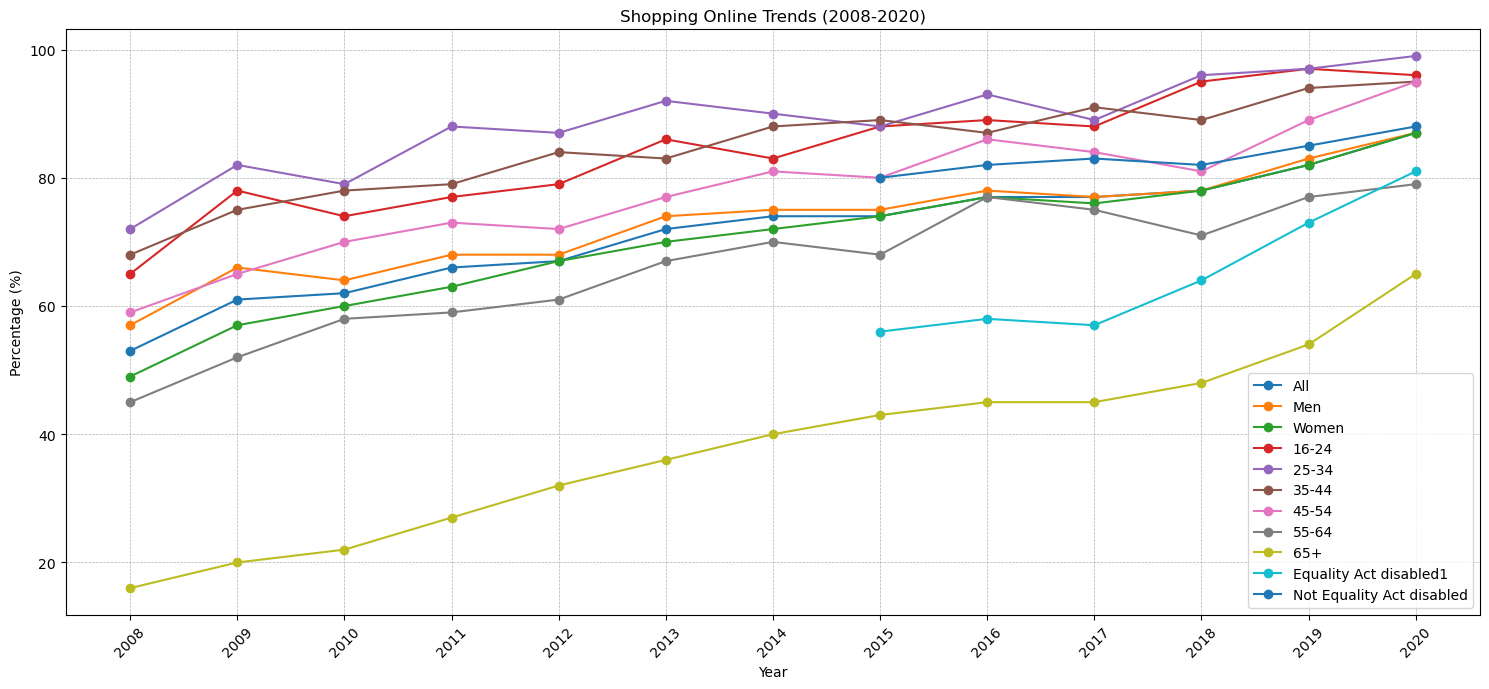

In [18]:
import matplotlib.pyplot as plt

# Convert the data to numeric type
table_8_2020 = table_8_2020.apply(pd.to_numeric, errors='coerce')

# Plot
plt.figure(figsize=(15,7))
for demo in table_8_2020.index:
    plt.plot(table_8_2020.columns, table_8_2020.loc[demo], label=demo, marker='o')
    
plt.title("Shopping Online Trends (2008-2020)")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



- **Heatmap**

Provides a quick visual summary, showing which demographics had high levels of online shopping in which years.

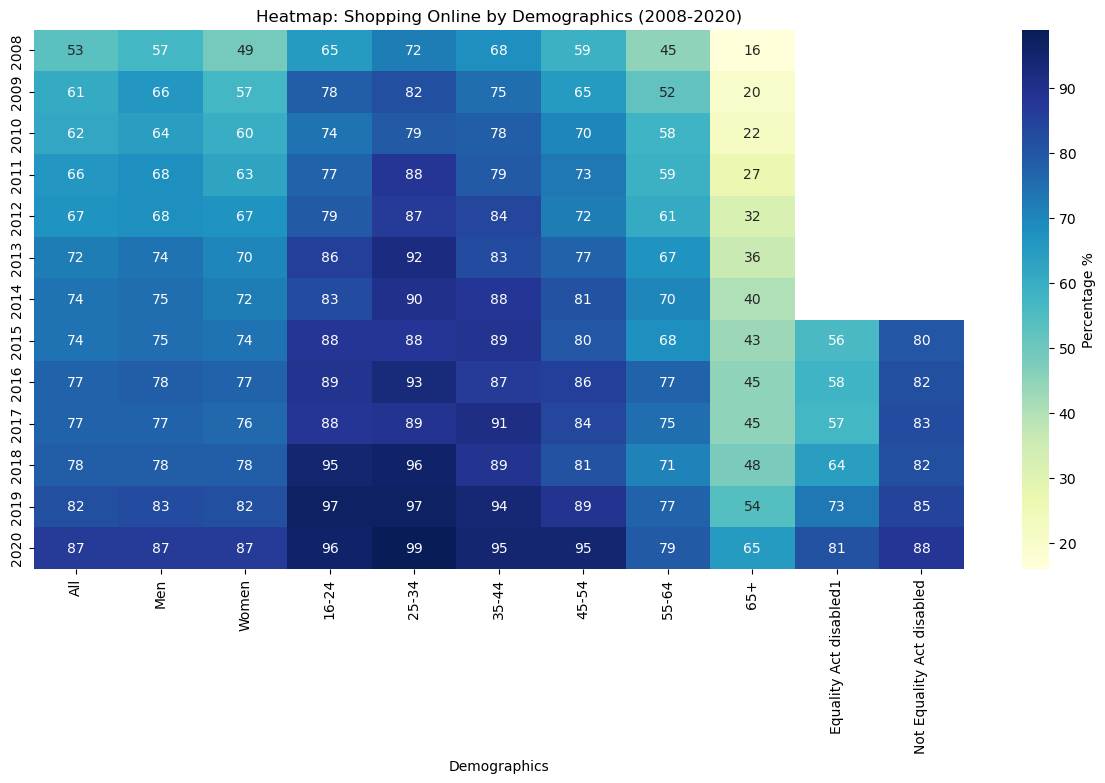

In [19]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.heatmap(table_8_2020.astype(float).transpose(), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage %'})
plt.title("Heatmap: Shopping Online by Demographics (2008-2020)")
plt.show()


The heatmap offers a bird's-eye view of online shopping activities over the years across various demographics. Darker shades in recent years underscore the ubiquitous nature of online shopping in modern times across all demographics.

- **Boxplots**

They will offer an overview of the distribution and spread of online shopping trends by year across different demographics.

In [20]:
# Transpose the data for boxplot
transposed_data = table_8_2020.transpose()

fig = go.Figure()

for column in transposed_data.columns:
    fig.add_trace(go.Box(y=transposed_data[column], name=column))

fig.update_layout(title="Distribution of Online Shopping Trends by Year",
                  xaxis_title="Demographics",
                  yaxis_title="Percentage (%)")

fig.show()


Through boxplots, we see the distribution of online shopping trends for each year. It highlights the median, quartiles, and potential outliers in shopping habits, offering a more granular understanding of how each year performed.

- **Differential Growth Analysis**

In [21]:
# Calculate year-over-year growth rates for each demographic
growth_rates = table_8_2020.pct_change(axis=1) * 100

# Create the figure
fig = go.Figure()

for demo in growth_rates.index:
    fig.add_trace(go.Scatter(x=growth_rates.columns, 
                             y=growth_rates.loc[demo], 
                             mode='lines+markers',
                             name=demo))

fig.update_layout(title="Year-Over-Year Growth in Online Shopping (2008-2020)",
                  xaxis_title="Year",
                  yaxis_title="Growth Rate (%)")

fig.show()


By analyzing the growth rate from year to year, we pinpoint periods of rapid adoption or potential stagnation in online shopping habits. This can be vital for understanding underlying market dynamics and external influencing factors.

- **Correlation Analysis**

In [22]:
correlation = table_8_2020.transpose().corr()

fig = px.imshow(correlation, 
                labels=dict(color="Correlation Coefficient"),
                x=correlation.columns, 
                y=correlation.columns,
                color_continuous_scale='RdBu_r')

fig.update_layout(title="Correlation between Different Demographics")
fig.show()


By exploring how trends in one demographic relate to another, we can discern underlying patterns. A high correlation might suggest common external factors influencing the shopping habits of both demographics.

- **Bar Chart for 2020 Data**

To see the distribution for the year 2020.

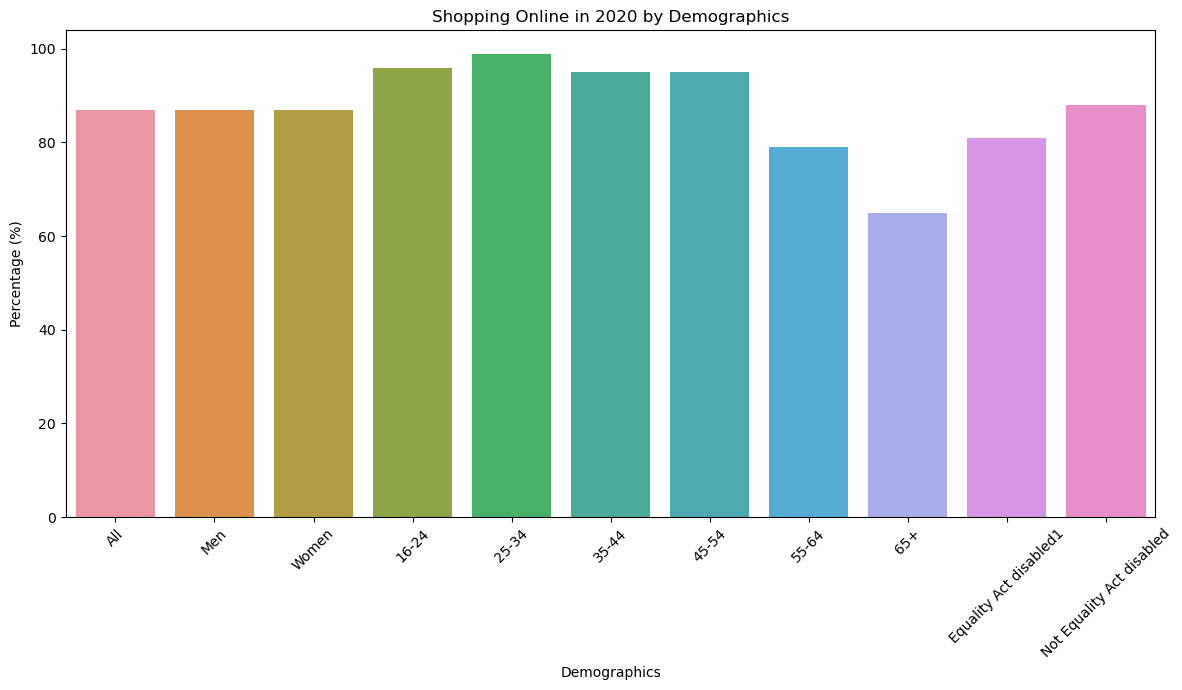

In [23]:
plt.figure(figsize=(12,7))
sns.barplot(x=table_8_2020.index, y=table_8_2020['2020'])
plt.title("Shopping Online in 2020 by Demographics")
plt.ylabel("Percentage (%)")
plt.xlabel("Demographics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Focusing on the most recent year, this bar chart lays bare the demographic distribution for online shopping in 2020. It provides a snapshot of the current state of e-commerce adoption across various user segments.

- **Line Plot with Event Annotations**

In [24]:
# Example: Plot for 'All' demographics with an annotation for 2020
fig = go.Figure()

fig.add_trace(go.Scatter(x=table_8_2020.columns, 
                         y=table_8_2020.loc['All'], 
                         mode='lines+markers',
                         name='All'))

# Add annotation for COVID-19 in 2020
fig.add_annotation(dict(x='2020',
                        y=table_8_2020['2020']['All'],
                        text="COVID-19 pandemic",
                        showarrow=True,
                        arrowhead=4))

fig.update_layout(title="Overall Online Shopping Trends (2008-2020)",
                  xaxis_title="Year",
                  yaxis_title="Percentage (%)")

fig.show()


Key global and regional events, notably the COVID-19 pandemic, have had pronounced impacts on online shopping trends, with notable surges corresponding to these events.

### **5. Online Purchases of Physical Goods: A Deep Dive into Age, Gender, and Disability Status**

In [25]:
#2015

In [26]:
from IPython.display import display
import pandas as pd

# Load the data
table_12_2015 = pd.read_excel("internetaccesspublicationtables2015.xls", sheet_name='12')
#display(table_12_2015)
# Combine rows 0, 1, 2, and 3 to form a unified column header
table_12_2015.columns = [' '.join(filter(pd.notna, row)) for row in zip(table_12_2015.iloc[0], table_12_2015.iloc[1], table_12_2015.iloc[2], table_12_2015.iloc[3])]

# Drop the rows that were used for the headers and any unnecessary footer rows
table_12_2015 = table_12_2015.drop([0, 1, 2, 3])

# Reset the index for good measure
table_12_2015.reset_index(drop=True, inplace=True)

# Remove columns that are fully NaN and rows as well
table_12_2015.dropna(axis=1, how='all', inplace=True)
table_12_2015.dropna(axis=0, how='all', inplace=True)

# Rename the 'Purchase Category' column for clarity
table_12_2015 = table_12_2015.rename(columns={table_12_2015.columns[0]: "Purchase Category"})

# Display the cleaned table
display(table_12_2015)


Purchase Category                    \
0                                                 NaN  Age group    NaN   
1                                                 NaN      16-24  25-34   
3                             Clothes or sports goods         74     69   
4            Household goods (eg furniture, toys etc)         36     59   
5   Travel arrangements (eg transport tickets, car...         34     44   
6                               Holiday accommodation         26     47   
7                                  Tickets for events         39     39   
8                  Films, music (including downloads)         44     41   
9   Books, magazines, newspapers (including e-book...         29     31   
10                                  Food or groceries         20     31   
11           Electronic equipment (including cameras)         26     27   
12  Video games software, other computer software ...         30     27   
14            Share purchases, insurance policies etc         12     29   
15                         Telecommunication services         14     20   
16                                  Computer hardware         18     12   
17                                          Medicine           9      8   
18                                E-learning material          9      9   
21          Base: Adults (aged 16+) in Great Britain.        NaN    NaN   
22  1. Equality Act disabled refers to those who h...        NaN    NaN   

                                         Equality Act disabled1  \
0     NaN    NaN    NaN  NaN  Sex    NaN                    NaN   
1   35-44  45-54  55-64  65+  Men  Women                    NaN   
3      70     57     42   19   53     56                     37   
4      65     49     40   22   44     45                     37   
5      46     44     37   19   40     34                     23   
6      50     45     40   21   37     37                     25   
7      48     43     34   12   36     34                     22   
8      43     33     21    7   37     28                     17   
9      41     34     30   18   29     31                     23   
10     40     27     16    7   20     26                     19   
11     33     24     14    9   31     16                     16   
12     37     18     11    5   28     16                     13   
14     30     24     21   10   24     18                     16   
15     26     22     14    7   21     14                     12   
16     16     11     10    4   19      7                      9   
17     11     12     11    7   10     10                     12   
18      9      6      3    1    6      6                      4   
21    NaN    NaN    NaN  NaN  NaN    NaN                    NaN   
22    NaN    NaN    NaN  NaN  NaN    NaN                    NaN   

   Not Equality Act disabled                                       %  
0                        NaN                                     NaN  
1                        NaN                                     All  
3                         60                                      55  
4                         46                                      44  
5                         41                                      37  
6                         41                                      37  
7                         39                                      35  
8                         35                                      31  
9                         32                                      30  
10                        24                                      23  
11                        24                                      22  
12                        23                                      21  
14                        22                                      20  
15                        18                                      17  
16                        13                                      12  
17                         9                              

In [27]:
# Renaming the columns based on your instruction
table_12_2015.columns = ['Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled', 'Not Equality Act disabled', 'All']

# Identifying and dropping the unwanted rows
#rows_to_drop = table_12_2015[table_12_2015['Purchase Category'].str.contains("Base: Adults|Equality Act disabled", na=False)].index
#table_12_2015 = table_12_2015.drop(rows_to_drop)

# Reset the index for clarity
table_12_2015.reset_index(drop=True, inplace=True)

# Display the final cleaned table
#display(table_12_2015)


In [28]:
# Drop rows with NaN values in 'Purchase Category' column
table_12_2015 = table_12_2015[pd.notna(table_12_2015['Purchase Category'])]

# Display the cleaned table without NaN values in the 'Purchase Category' column
#display(table_12_2015)



In [29]:
# Drop the specific rows
rows_to_drop = [17, 18]
table_12_2015 = table_12_2015.drop(rows_to_drop)

# Reset the index after dropping rows
table_12_2015.reset_index(drop=True, inplace=True)

# Display the final cleaned table
display(table_12_2015)


Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        74        69   
1            Household goods (eg furniture, toys etc)        36        59   
2   Travel arrangements (eg transport tickets, car...        34        44   
3                               Holiday accommodation        26        47   
4                                  Tickets for events        39        39   
5                  Films, music (including downloads)        44        41   
6   Books, magazines, newspapers (including e-book...        29        31   
7                                   Food or groceries        20        31   
8            Electronic equipment (including cameras)        26        27   
9   Video games software, other computer software ...        30        27   
10            Share purchases, insurance policies etc        12        29   
11                         Telecommunication services        14        20   
12                                  Computer hardware        18        12   
13                                          Medicine          9         8   
14                                E-learning material         9         9   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women Equality Act disabled  \
0         70        57        42      19  53    56                    37   
1         65        49        40      22  44    45                    37   
2         46        44        37      19  40    34                    23   
3         50        45        40      21  37    37                    25   
4         48        43        34      12  36    34                    22   
5         43        33        21       7  37    28                    17   
6         41        34        30      18  29    31                    23   
7         40        27        16       7  20    26                    19   
8         33        24        14       9  31    16                    16   
9         37        18        11       5  28    16                    13   
10        30        24        21      10  24    18                    16   
11        26        22        14       7  21    14                    12   
12        16        11        10       4  19     7                     9   
13        11        12        11       7  10    10                    12   
14         9         6         3       1   6     6                     4   

   Not Equality Act disabled All  
0                         60  55  
1                         46  44  
2                         41  37  
3                         41  37  
4                         39  35  
5                         35  31  
6                         32  30  
7                         24  23  
8                         24  22  
9                         23  21  
10                        22  20  
11                        18  17  
12                        13  12  
13                         9  10  
14                         7   6

In [30]:
# 2016

In [31]:
from IPython.display import display
import pandas as pd

# Load the data
table_12_2016 = pd.read_excel("internetaccesspublicationtables2016.xls", sheet_name='12')

# Combine rows 0, 1, 2, and 3 to form a unified column header
table_12_2016.columns = [' '.join(filter(pd.notna, row)) for row in zip(table_12_2016.iloc[0], table_12_2016.iloc[1], table_12_2016.iloc[2], table_12_2016.iloc[3])]

# Drop the rows that were used for the headers and any unnecessary footer rows
table_12_2016 = table_12_2016.drop([0, 1, 2, 3])

# Reset the index for good measure
table_12_2016.reset_index(drop=True, inplace=True)

# Remove columns that are fully NaN and rows as well
table_12_2016.dropna(axis=1, how='all', inplace=True)
table_12_2016.dropna(axis=0, how='all', inplace=True)

# Rename the 'Purchase Category' column for clarity
table_12_2016 = table_12_2016.rename(columns={table_12_2016.columns[0]: "Purchase Category"})

# Display the cleaned table
#display(table_12_2016)


In [32]:
# Renaming the columns based on your instruction
table_12_2016.columns = ['Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled', 'Not Equality Act disabled', 'All']

# Identifying and dropping the unwanted rows
#rows_to_drop = table_12_2015[table_12_2015['Purchase Category'].str.contains("Base: Adults|Equality Act disabled", na=False)].index
#table_12_2015 = table_12_2015.drop(rows_to_drop)

# Reset the index for clarity
table_12_2016.reset_index(drop=True, inplace=True)

# Display the final cleaned table
# display(table_12_2016)


In [33]:
# Drop rows with NaN values in 'Purchase Category' column
table_12_2016 = table_12_2016[pd.notna(table_12_2016['Purchase Category'])]

# Display the cleaned table without NaN values in the 'Purchase Category' column
#display(table_12_2016)

In [34]:
# Drop the specific rows
rows_to_drop = [16, 17]
table_12_2016 = table_12_2016.drop(rows_to_drop)

# Reset the index after dropping rows
table_12_2016.reset_index(drop=True, inplace=True)

# Display the final cleaned table
display(table_12_2016)

Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        69        73   
1            Household goods (eg furniture, toys etc)        34        65   
2                               Holiday accommodation        31        52   
3   Travel arrangements (eg transport tickets, car...        33        50   
4                                  Tickets for events        40        50   
5                  Films, music (including downloads)        43        46   
6   Books, magazines, newspapers (including e-book...        27        33   
7                                   Food or groceries        23        37   
8            Electronic equipment (including cameras)        26        34   
9   Video games software, other computer software ...        36        27   
10                         Telecommunication services        13        25   
11                                  Computer hardware        19        20   
12                                          Medicine          8        10   
13                                E-learning material        11         9   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women Equality Act disabled  \
0         64        58        50      24  49    59                    36   
1         65        56        49      24  47    49                    36   
2         51        52        45      24  43    41                    24   
3         47        45        41      19  39    38                    22   
4         47        46        40      13  38    37                    21   
5         43        35        22       6  34    29                    15   
6         37        37        35      19  29    32                    23   
7         39        30        20       9  23    28                    21   
8         31        28        22       9  32    17                    18   
9         27        22        12       4  25    15                    12   
10        24        24        16       8  22    15                    11   
11        18        18        11       6  21     9                    11   
12        14        16        15       9  11    13                    13   
13        11         9         6       1   8     7                     5   

   Not Equality Act disabled All  
0                         59  54  
1                         51  48  
2                         46  42  
3                         42  38  
4                         42  38  
5                         35  31  
6                         32  31  
7                         27  26  
8                         26  24  
9                         22  20  
10                        20  18  
11                        16  15  
12                        12  12  
13                         8   7

In [35]:
#2017

In [36]:
# Read the data from the Excel file again
table_16_2017 = pd.read_excel("internetaccesspublicationtables2017.xls", sheet_name='16', skiprows=4)  # We're skipping the first 4 rows to get to the actual data

# Drop any columns and rows that are entirely NaN, if any
table_16_2017.dropna(axis=1, how='all', inplace=True)
table_16_2017.dropna(axis=0, how='all', inplace=True)

# Resetting the index for clarity
table_16_2017.reset_index(drop=True, inplace=True)

# Display the current state of the table and its columns
#print(table_16_2017.columns)
#display(table_16_2017)


In [37]:
# Drop the first two rows that seem like headers
table_16_2017 = table_16_2017.drop([0, 1])

# Rename the columns to the desired names
desired_columns = ['Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled', 'Not Equality Act disabled', 'Temp', 'All']
table_16_2017.columns = desired_columns

# Drop the temporary column
table_16_2017 = table_16_2017.drop(columns=['Temp'])

# Drop the rows with metadata
rows_to_drop = table_16_2017[table_16_2017['Purchase Category'].str.contains("Base: Adults|Equality Act disabled", na=False)].index
table_16_2017 = table_16_2017.drop(rows_to_drop)

# Reset the index for clarity
table_16_2017.reset_index(drop=True, inplace=True)

# Display the final cleaned table
display(table_16_2017)


Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        73        70   
1            Household goods (eg furniture, toys etc)        40        65   
2                               Holiday accommodation        37        52   
3   Travel arrangements (eg transport tickets, car...        40        48   
4                                  Tickets for events        44        42   
5                  Films, music (including downloads)        45        47   
6   Books, magazines, newspapers (including e-book...        25        34   
7                                   Food or groceries        24        37   
8            Electronic equipment (including cameras)        39        33   
9   Video games software, other computer software ...        40        33   
10                         Telecommunication services        15        25   
11                                  Computer hardware        23        20   
12                                          Medicine          8        13   
13                                E-learning material         7        10   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
0         72        63        47      24  53    59                   37.0   
1         72        55        49      25  50    50                   38.0   
2         55        54        47      23  47    41                   27.0   
3         47        47        41      20  43    36                   23.0   
4         46        46        36      14  39    34                   22.0   
5         48        36        26      10  39    29                   21.0   
6         39        31        32      19  29    30                   22.0   
7         41        25        21      10  23    28                   18.0   
8         33        27        19       7  33    18                   16.0   
9         34        22        15       5  31    17                   15.0   
10        32        22        18       9  25    15                   15.0   
11        22        17        11       4  21    10                   10.0   
12        16        13        14       8  13    11                   13.0   
13        16         9         6       1   8     7                    5.0   

    Not Equality Act disabled All  
0                        62.0  56  
1                        54.0  50  
2                        49.0  44  
3                        45.0  40  
4                        41.0  37  
5                        38.0  34  
6                        32.0  29  
7                        28.0  26  
8                        28.0  25  
9                        26.0  24  
10                       21.0  20  
11                       17.0  15  
12                       12.0  12  
13                        9.0   8

In [38]:
#2018

In [39]:
import pandas as pd
from IPython.display import display

# Read the data from the Excel file
table_15_2018 = pd.read_excel("internetaccesspublicationtables2018.xls", sheet_name='15', skiprows=4)  # We're skipping the first 4 rows to get to the actual data

# Drop any columns and rows that are entirely NaN
table_15_2018.dropna(axis=1, how='all', inplace=True)
table_15_2018.dropna(axis=0, how='all', inplace=True)

# Resetting the index for clarity
table_15_2018.reset_index(drop=True, inplace=True)

# Display the current state of the table to understand its structure
#display(table_15_2018)

# Drop the first two rows, as they're just labels
table_15_2018 = table_15_2018.drop([0, 1])

# Rename columns based on what's been provided
column_names = [
    'Purchase Category', 
    'Age 16-24', 
    'Age 25-34', 
    'Age 35-44', 
    'Age 45-54', 
    'Age 55-64', 
    'Age 65+', 
    'Men', 
    'Women', 
    'Equality Act disabled', 
    'Not Equality Act disabled', 
    'Temp', 
    'All'
]
table_15_2018.columns = column_names

# Drop the Temp column, as it's unnecessary, and the metadata rows
table_15_2018 = table_15_2018.drop(columns=['Temp'])
table_15_2018 = table_15_2018.drop([16, 17])

# Reset the index for clarity
table_15_2018.reset_index(drop=True, inplace=True)

# Display the cleaned table
display(table_15_2018)


Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        74        70   
1   Household goods (eg furniture, toys, vehicles ...        36        65   
2                               Holiday accommodation        29        53   
3                                  Tickets for events        51        51   
4   Travel arrangements (eg transport tickets, car...        38        48   
5                  Films, music (including downloads)        43        43   
6   Books, magazines, newspapers (including e-book...        38        31   
7                                   Food or groceries        25        38   
8            Electronic equipment (including cameras)        40        34   
9   Video games software, other computer software ...        38        36   
10                         Telecommunication services        23        21   
11                                  Computer hardware        17        17   
12                                          Medicine          9        13   
13                                E-learning material         8        14   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
0         72        60        42      24  50    59                   42.0   
1         73        48        42      25  47    49                   39.0   
2         56        46        45      24  40    44                   30.0   
3         51        46        35      15  38    41                   28.0   
4         51        42        37      20  41    36                   27.0   
5         47        43        26      11  36    32                   26.0   
6         38        35        31      19  31    32                   25.0   
7         48        30        20      11  25    31                   23.0   
8         36        29        20      10  35    19                   20.0   
9         32        23        10       2  29    15                   15.0   
10        26        26        17       7  25    14                   16.0   
11        16        16        11       4  18     8                    9.0   
12        17        14        13       8  12    13                   12.0   
13        18        12         5       2  11     9                    7.0   

    Not Equality Act disabled All  
0                        58.0  55  
1                        50.0  48  
2                        45.0  42  
3                        43.0  40  
4                        42.0  39  
5                        36.0  34  
6                        33.0  31  
7                        29.0  28  
8                        29.0  27  
9                        24.0  22  
10                       20.0  19  
11                       14.0  13  
12                       12.0  12  
13                       10.0  10

In [40]:
#2019

In [41]:
from IPython.display import display
import pandas as pd

# Load the dataset from the specified Excel file
table_16_2019 = pd.read_excel("internetaccesspublicationtables2019.xlsx", sheet_name='16', skiprows=4)  # Skipping the first 4 rows based on previous pattern

# Drop any columns and rows that are entirely NaN, if any
table_16_2019.dropna(axis=1, how='all', inplace=True)
table_16_2019.dropna(axis=0, how='all', inplace=True)

# Now, identify the column which most likely is the "Purchase Category"
# We'll assume this column has the maximum number of unique string entries
potential_category_cols = table_16_2019.applymap(type) == str
category_col = potential_category_cols.sum().idxmax()

# Remove the non-data rows based on the identified column
table_16_2019 = table_16_2019.dropna(subset=[category_col])

# Reset the index for clarity
table_16_2019.reset_index(drop=True, inplace=True)

# Display the cleaned table
#display(table_16_2019)

# Rename the columns
column_names = [
    'Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 
    'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled', 
    'Not Equality Act disabled', 'All'
]
table_16_2019.columns = column_names

# Remove rows with metadata/notes
table_16_2019 = table_16_2019.drop([14, 15])

# Reset the index for clarity
table_16_2019.reset_index(drop=True, inplace=True)

# Display the cleaned table again in a table format
display(table_16_2019)


Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        79        80   
1   Household goods (eg furniture, toys, vehicles ...        34        68   
2                                  Tickets for events        53        57   
3                               Holiday accommodation        31        59   
4   Travel arrangements (eg transport tickets, car...        45        56   
5                  Films, music (including downloads)        50        57   
6   Books, magazines, newspapers (including e-book...        24        42   
7            Electronic equipment (including cameras)        46        49   
8                                   Food or groceries        27        45   
9   Video games software, other computer software ...        44        41   
10                         Telecommunication services        18        34   
11                                          Medicine         14        16   
12                                  Computer hardware        22        19   
13                                E-learning material        24        16   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
0         69        65        49      33  56    64                   50.0   
1         70        56        47      26  48    49                   44.0   
2         56        49        38      20  45    43                   33.0   
3         52        51        41      28  45    41                   33.0   
4         52        54        38      24  47    40                   32.0   
5         50        47        29      11  44    34                   32.0   
6         45        38        37      20  30    37                   28.0   
7         44        34        27      14  42    26                   31.0   
8         40        33        19      13  26    31                   29.0   
9         38        25        12       5  34    17                   23.0   
10        33        21        19      10  26    18                   19.0   
11        26        16        15      12  15    18                   14.0   
12        21        15        10       4  21     8                   14.0   
13        14         8         6       2  12    10                    7.0   

    Not Equality Act disabled All  
0                        64.0  60  
1                        51.0  49  
2                        48.0  44  
3                        46.0  43  
4                        47.0  43  
5                        41.0  39  
6                        35.0  34  
7                        35.0  34  
8                        29.0  29  
9                        27.0  26  
10                       23.0  22  
11                       17.0  16  
12                       14.0  14  
13                       12.0  11

In [42]:
# Merge tables one by one
merged_df = table_12_2015.merge(table_12_2016, on="Purchase Category", suffixes=('_2015', '_2016'))
merged_df = merged_df.merge(table_16_2017, on="Purchase Category", suffixes=('', '_2017'))
merged_df = merged_df.merge(table_15_2018, on="Purchase Category", suffixes=('', '_2018'))
merged_df = merged_df.merge(table_16_2019, on="Purchase Category", suffixes=('', '_2019'))

# Display the merged table
display(merged_df)


Purchase Category Age 16-24_2015  \
0                             Clothes or sports goods             74   
1   Travel arrangements (eg transport tickets, car...             34   
2                               Holiday accommodation             26   
3                                  Tickets for events             39   
4                  Films, music (including downloads)             44   
5   Books, magazines, newspapers (including e-book...             29   
6                                   Food or groceries             20   
7            Electronic equipment (including cameras)             26   
8   Video games software, other computer software ...             30   
9                          Telecommunication services             14   
10                                  Computer hardware             18   
11                                          Medicine               9   
12                                E-learning material              9   

   Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0              69             70             57             42           19   
1              44             46             44             37           19   
2              47             50             45             40           21   
3              39             48             43             34           12   
4              41             43             33             21            7   
5              31             41             34             30           18   
6              31             40             27             16            7   
7              27             33             24             14            9   
8              27             37             18             11            5   
9              20             26             22             14            7   
10             12             16             11             10            4   
11              8             11             12             11            7   
12              9              9              6              3            1   

   Men_2015 Women_2015 Equality Act disabled_2015  ... Age 25-34_2019  \
0        53         56                         37  ...             80   
1        40         34                         23  ...             56   
2        37         37                         25  ...             59   
3        36         34                         22  ...             57   
4        37         28                         17  ...             57   
5        29         31                         23  ...             42   
6        20         26                         19  ...             45   
7        31         16                         16  ...             49   
8        28         16                         13  ...             41   
9        21         14                         12  ...             34   
10       19          7                          9  ...             19   
11       10         10                         12  ...             16   
12        6          6                          4  ...             16   

   Age 35-44_2019 Age 45-54_2019 Age 55-64_2019 Age 65+_2019 Men_2019  \
0              69             65             49           33       56   
1              52             54             38           24       47   
2              52             51             41           28       45   
3              56             49             38           20       45   
4              50             47             29           11       44   
5              45             38             37           20       30   
6              40             33             19           13       26   
7              44             34             27           14       42   
8              38             25             12            5       34   
9              33             21             19           10       26   
10             21             15             10            4       21   
11             26    

In [43]:
from IPython.display import display
import pandas as pd

# Load the dataset from the specified Excel file
table_11_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='11', skiprows=4)  # Skipping the first 4 rows based on previous pattern

# Drop any columns and rows that are entirely NaN, if any
table_11_2020.dropna(axis=1, how='all', inplace=True)
table_11_2020.dropna(axis=0, how='all', inplace=True)

# Now, identify the column which most likely is the "Purchase Category"
# We'll assume this column has the maximum number of unique string entries
potential_category_cols = table_11_2020.applymap(type) == str
category_col = potential_category_cols.sum().idxmax()

# Remove the non-data rows based on the identified column
table_11_2020 = table_11_2020.dropna(subset=[category_col])

# Reset the index for clarity
table_11_2020.reset_index(drop=True, inplace=True)

# Display the cleaned table
#display(table_11_2020)

# Rename the columns
column_names = [
    'Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 
    'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled', 
    'Not Equality Act disabled', 'All'
]
table_11_2020.columns = column_names

# Remove rows with metadata/notes
table_11_2020 = table_11_2020.drop([15,16,17])

# Reset the index for clarity
table_11_2020.reset_index(drop=True, inplace=True)

# Display the cleaned table again in a table format
display(table_11_2020)


Purchase Category Age 16-24 Age 25-34  \
0   Clothes (including sports clothing), shoes and...        69        68   
1   Deliveries from restaurants, fast-food chains ...        52        65   
2              Printed books, magazines or newspapers        33        28   
3   Furniture, home accessories or gardening products        20        35   
4    Computers, tablets, mobile phones or accessories        35        32   
5                  Children's toys or childcare items        10        32   
6              Cosmetics, beauty or wellness products        20        32   
7      Cleaning products or personal hygiene products         9        30   
8   Consumer electronics, for example TVs, stereos...        17        22   
9            Sports goods (Excluding sports clothing)        20        19   
10  Food or beverages from stores, or from meal-ki...        11        18   
11  Medicine or dietary supplements such as vitamins         12        15   
12                 Physical copies of films or series        18        11   
13                           Physical copies of music        14        12   
14  Bicycles, mopeds, cars, or other vehicles or t...         4         6   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
0         71        66        44      27  49    62                   48.0   
1         43        32        12       3  32    32                   27.0   
2         39        34        28      18  28    30                   22.0   
3         41        35        25      18  29    28                   24.0   
4         32        30        15       8  27    21                   17.0   
5         44        22        17       9  19    24                   16.0   
6         32        26        17       9  15    29                   18.0   
7         26        24        14       7  16    20                   16.0   
8         25        23        14       8  23    13                   14.0   
9         27        23        14       5  22    12                   10.0   
10        19        21         9       5  13    14                   14.0   
11        18        16        10       9  13    13                   11.0   
12        17        15        12       6  15    11                   11.0   
13        15        16        14       7  15    10                   10.0   
14        15        17         4       3  11     5                    7.0   

    Not Equality Act disabled All  
0                        58.0  55  
1                        34.0  32  
2                        31.0  29  
3                        30.0  28  
4                        26.0  24  
5                        24.0  22  
6                        23.0  22  
7                        19.0  18  
8                        19.0  18  
9                        19.0  17  
10                       13.0  13  
11                       14.0  13  
12                       13.0  13  
13                       13.0  12  
14                        8.0   8

In [44]:
from IPython.display import display
import pandas as pd

# Load the dataset from the specified Excel file
table_12_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='12', skiprows=4)  # Skipping the first 4 rows based on previous pattern
#print(table_12_2020)

In [45]:
# Load the dataset
table_12_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='12', skiprows=4)  # Skipping the first 4 rows based on previous pattern

# Specify column names
column_names = [
    'Index', 'Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 
    'Age 55-64', 'Age 65+', 'Unknown1', 'Men', 'Women', 'Unknown2', 
    'Equality Act disabled', 'Not Equality Act disabled', 'Unknown3', 'All'
]
table_12_2020.columns = column_names

# Drop the first two rows which are now redundant
table_12_2020 = table_12_2020.drop([0, 1])

# Reset the index for clarity
table_12_2020.reset_index(drop=True, inplace=True)

# Remove columns with 'Unknown' label as they were not named properly
table_12_2020 = table_12_2020.drop(columns=['Unknown1', 'Unknown2', 'Unknown3'])

# Remove any rows where 'Purchase Category' is NaN
table_12_2020 = table_12_2020[pd.notnull(table_12_2020['Purchase Category'])]

# Drop the "Index" column
table_12_2020 = table_12_2020.drop(columns=['Index'])

# Display the cleaned table
display(table_12_2020.head())


Purchase Category Age 16-24 Age 25-34  \
1           Music as a streaming service or download        45        37   
2  Films or series as a streaming service or down...        37        39   
3     E-books, online magazines or online newspapers         9        14   
4                         Online or downloaded games        30        27   
5            Computer or other software as downloads        14        18   

  Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
1        33        30        18       5  30    22                   23.0   
2        33        32        14       6  30    21                   19.0   
3        15        19        17      10  14    14                   14.0   
4        21        30         5       4  23    14                   15.0   
5        15        21        10       7  19     8                    9.0   

   Not Equality Act disabled All  
1                       27.0  26  
2                       27.0  25  
3                       14.0  14  
4                       19.0  18  
5                       15.0  14

In [46]:
from IPython.display import display
import pandas as pd

# Load the dataset from the specified Excel file
table_13_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='13', skiprows=4)  # Skipping the first 4 rows based on previous pattern
#print(table_13_2020)

In [47]:
# Load the dataset
table_13_2020 = pd.read_excel("internetaccesspublicationtables2020.xlsx", sheet_name='13', skiprows=4)  # Skipping the first 4 rows based on previous pattern

# Specify column names
column_names = [
    'Index', 'Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54', 
    'Age 55-64', 'Age 65+', 'Unknown1', 'Men', 'Women', 'Unknown2', 
    'Equality Act disabled', 'Not Equality Act disabled', 'Unknown3', 'All'
]
table_13_2020.columns = column_names

# Drop the first two rows which are now redundant
table_13_2020 = table_13_2020.drop([0, 1])

# Reset the index for clarity
table_13_2020.reset_index(drop=True, inplace=True)

# Remove columns with 'Unknown' label as they were not named properly
table_13_2020 = table_13_2020.drop(columns=['Unknown1', 'Unknown2', 'Unknown3'])

# Remove any rows where 'Purchase Category' is NaN
table_13_2020 = table_13_2020[pd.notnull(table_13_2020['Purchase Category'])]

# Drop the "Index" column
table_13_2020 = table_13_2020.drop(columns=['Index'])

# Display the cleaned table
display(table_13_2020.head())


Purchase Category Age 16-24 Age 25-34  \
1                Tickets to cultural or other events        43        45   
2  Electricity, water or heating supply, waste di...         9        18   
4  Subscriptions to internet or mobile phone conn...        16        14   
5                           Tickets to sports events        10        13   
6  Household services, such as cleaning, babysitt...         2         7   

  Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
1        43        41        32      14  34    35                   26.0   
2        22        19        12      11  15    15                   15.0   
4        14        13         7       7  15     8                   11.0   
5        12        10         7       2  12     6                    3.0   
6         8         4         4       2   4     5                    4.0   

   Not Equality Act disabled All  
1                       37.0  35  
2                       15.0  15  
4                       11.0  11  
5                       10.0   8  
6                        5.0   5

In [48]:
# Concatenate the dataframes vertically
combined_data = pd.concat([table_11_2020, table_12_2020, table_13_2020], axis=0).reset_index(drop=True)

#combined_data = table_11_2020.drop([25,26,27])

# Display the combined data
display(combined_data)

Purchase Category Age 16-24 Age 25-34  \
0   Clothes (including sports clothing), shoes and...        69        68   
1   Deliveries from restaurants, fast-food chains ...        52        65   
2              Printed books, magazines or newspapers        33        28   
3   Furniture, home accessories or gardening products        20        35   
4    Computers, tablets, mobile phones or accessories        35        32   
5                  Children's toys or childcare items        10        32   
6              Cosmetics, beauty or wellness products        20        32   
7      Cleaning products or personal hygiene products         9        30   
8   Consumer electronics, for example TVs, stereos...        17        22   
9            Sports goods (Excluding sports clothing)        20        19   
10  Food or beverages from stores, or from meal-ki...        11        18   
11  Medicine or dietary supplements such as vitamins         12        15   
12                 Physical copies of films or series        18        11   
13                           Physical copies of music        14        12   
14  Bicycles, mopeds, cars, or other vehicles or t...         4         6   
15           Music as a streaming service or download        45        37   
16  Films or series as a streaming service or down...        37        39   
17     E-books, online magazines or online newspapers         9        14   
18                         Online or downloaded games        30        27   
19            Computer or other software as downloads        14        18   
20             Paid apps related to health or fitness         7         5   
21                                    Other paid apps         5         7   
22          Base: Adults (aged 16+) in Great Britain.       NaN       NaN   
23  1. Equality Act disabled refers to those who h...       NaN       NaN   
24  Online purchases were measured in previous rel...       NaN       NaN   
25                Tickets to cultural or other events        43        45   
26  Electricity, water or heating supply, waste di...         9        18   
27  Subscriptions to internet or mobile phone conn...        16        14   
28                           Tickets to sports events        10        13   
29  Household services, such as cleaning, babysitt...         2         7   
30          Base: Adults (aged 16+) in Great Britain.       NaN       NaN   
31  1. Equality Act disabled refers to those who h...       NaN       NaN   
32  Online purchases were measured in previous rel...       NaN       NaN   

   Age 35-44 Age 45-54 Age 55-64 Age 65+  Men Women  Equality Act disabled  \
0         71        66        44      27   49    62                   48.0   
1         43        32        12       3   32    32                   27.0   
2         39        34        28      18   28    30                   22.0   
3         41        35        25      18   29    28                   24.0   
4         32        30        15       8   27    21                   17.0   
5         44        22        17       9   19    24                   16.0   
6         32        26        17       9   15    29                   18.0   
7         26        24        14       7   16    20                   16.0   
8         25        23        14       8   23    13                   14.0   
9         27        23        14       5   22    12                   10.0   
10        19        21         9       5   13    14                   14.0   
11        18        16        10       9   13    13                   11.0   
12        17        15        12       6   15    11                   11.0   
13        15        16        14       7   15    10                   10.0   
14        15        17         4       3   11     5                    7.0   
15        33        30        18       5   30    22                   23.0   
16        33        32        14       6   30    21                   19.0   
17        15 

In [49]:
# Strip any potential whitespaces
combined_data['Purchase Category'] = combined_data['Purchase Category'].str.strip()

# Rename the 'Medicine' category again
combined_data['Purchase Category'] = combined_data['Purchase Category'].replace('Medicine or dietary supplements such as vitamins', 'Medicine')


In [50]:
#Search for the string using a partial match
matches = combined_data[combined_data['Purchase Category'].str.contains("Medicine", case=False, na=False)]
print(matches['Purchase Category'].unique())


['Medicine']


In [51]:
#Check data types
print(combined_data['Purchase Category'].apply(type).unique())


[<class 'str'>]


In [52]:
# Check if the specific string exists
exists = 'Medicine or dietary supplements such as vitamins' in combined_data['Purchase Category'].values
print("Does the category exist in the dataframe:", exists)

Does the category exist in the dataframe: False


In [53]:
# Corrected mapping dictionary
category_map = {
    'Clothes (including sports clothing), shoes and accessories': 'Clothes or sports goods',
    'Sports goods (Excluding sports clothing)': 'Clothes or sports goods',
    'Furniture, home accessories or gardening products': 'Household goods (eg furniture, toys, vehicles etc)',
    "Children's toys or childcare items": 'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets to cultural or other events': 'Tickets for events',
    'Tickets to sports events': 'Tickets for events',
    'Physical copies of films or series': 'Films, music (including downloads)',
    'Physical copies of music': 'Films, music (including downloads)',
    'Music as a streaming service or download': 'Films, music (including downloads)',
    'Films or series as a streaming service or download': 'Films, music (including downloads)',
    'Printed books, magazines or newspapers': 'Books, magazines, newspapers (including e-books and downloads)',
    'Computers, tablets, mobile phones or accessories': 'Electronic equipment (including cameras)',
    'Consumer electronics, for example TVs, stereos, cameras or household appliances': 'Electronic equipment (including cameras)',
    'Deliveries from restaurants, fast-food chains or catering services': 'Food or groceries',
    'Food or beverages from stores, or from meal-kit providers': 'Food or groceries',
    'Online or downloaded games': 'Video games software, other computer software and upgrades (including downloads)',
    'Medicine or dietary supplements such as vitamins': 'Medicine',
    'Computer or other software as downloads': 'Computer hardware',
    'E-books, online magazines or online newspapers': 'E-learning material'
}

# Apply the mapping to the 'Purchase Category' column
combined_data['Purchase Category'] = combined_data['Purchase Category'].map(lambda x: category_map.get(x, x))

# Display the updated data
display(combined_data)


Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        69        68   
1                                   Food or groceries        52        65   
2   Books, magazines, newspapers (including e-book...        33        28   
3   Household goods (eg furniture, toys, vehicles ...        20        35   
4            Electronic equipment (including cameras)        35        32   
5   Household goods (eg furniture, toys, vehicles ...        10        32   
6              Cosmetics, beauty or wellness products        20        32   
7      Cleaning products or personal hygiene products         9        30   
8            Electronic equipment (including cameras)        17        22   
9                             Clothes or sports goods        20        19   
10                                  Food or groceries        11        18   
11                                           Medicine        12        15   
12                 Films, music (including downloads)        18        11   
13                 Films, music (including downloads)        14        12   
14  Bicycles, mopeds, cars, or other vehicles or t...         4         6   
15                 Films, music (including downloads)        45        37   
16                 Films, music (including downloads)        37        39   
17                                E-learning material         9        14   
18  Video games software, other computer software ...        30        27   
19                                  Computer hardware        14        18   
20             Paid apps related to health or fitness         7         5   
21                                    Other paid apps         5         7   
22          Base: Adults (aged 16+) in Great Britain.       NaN       NaN   
23  1. Equality Act disabled refers to those who h...       NaN       NaN   
24  Online purchases were measured in previous rel...       NaN       NaN   
25                                 Tickets for events        43        45   
26  Electricity, water or heating supply, waste di...         9        18   
27  Subscriptions to internet or mobile phone conn...        16        14   
28                                 Tickets for events        10        13   
29  Household services, such as cleaning, babysitt...         2         7   
30          Base: Adults (aged 16+) in Great Britain.       NaN       NaN   
31  1. Equality Act disabled refers to those who h...       NaN       NaN   
32  Online purchases were measured in previous rel...       NaN       NaN   

   Age 35-44 Age 45-54 Age 55-64 Age 65+  Men Women  Equality Act disabled  \
0         71        66        44      27   49    62                   48.0   
1         43        32        12       3   32    32                   27.0   
2         39        34        28      18   28    30                   22.0   
3         41        35        25      18   29    28                   24.0   
4         32        30        15       8   27    21                   17.0   
5         44        22        17       9   19    24                   16.0   
6         32        26        17       9   15    29                   18.0   
7         26        24        14       7   16    20                   16.0   
8         25        23        14       8   23    13                   14.0   
9         27        23        14       5   22    12                   10.0   
10        19        21         9       5   13    14                   14.0   
11        18        16        10       9   13    13                   11.0   
12        17        15        12       6   15    11                   11.0   
13        15        16        14       7   15    10                   10.0   
14        15        17         4       3   11     5                    7.0   
15        33        30        18       5   30    22                   23.0   
16        33        32        14       6   30    21                   19.0   
17        15 

In [54]:
# List of desired categories
desired_order = [
    'Clothes or sports goods',
    'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets for events',
   # 'Holiday accommodation',
   # 'Travel arrangements (eg transport tickets, car hire)',
    'Films, music (including downloads)',
    'Books, magazines, newspapers (including e-books and downloads)',
    'Electronic equipment (including cameras)',
    'Food or groceries',
    'Video games software, other computer software and upgrades (including downloads)',
    #'Telecommunication services',
    #'Medicine or dietary supplements such as vitamins',
    'Computer hardware',
    'E-learning material'
]

# Filter the rows based on the desired categories
filtered_data = combined_data[combined_data['Purchase Category'].isin(desired_order)]

# Sort the dataframe based on the desired order
filtered_data['sort_order'] = filtered_data['Purchase Category'].apply(lambda x: desired_order.index(x))
filtered_data = filtered_data.sort_values(by='sort_order').drop(columns='sort_order').reset_index(drop=True)

# Display the sorted and filtered data
display(filtered_data)


C:\Users\alish\AppData\Local\Temp\ipykernel_13004\1902604669.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Purchase Category Age 16-24 Age 25-34  \
0                             Clothes or sports goods        69        68   
1                             Clothes or sports goods        20        19   
2   Household goods (eg furniture, toys, vehicles ...        20        35   
3   Household goods (eg furniture, toys, vehicles ...        10        32   
4                                  Tickets for events        43        45   
5                                  Tickets for events        10        13   
6                  Films, music (including downloads)        18        11   
7                  Films, music (including downloads)        14        12   
8                  Films, music (including downloads)        45        37   
9                  Films, music (including downloads)        37        39   
10  Books, magazines, newspapers (including e-book...        33        28   
11           Electronic equipment (including cameras)        17        22   
12           Electronic equipment (including cameras)        35        32   
13                                  Food or groceries        52        65   
14                                  Food or groceries        11        18   
15  Video games software, other computer software ...        30        27   
16                                  Computer hardware        14        18   
17                                E-learning material         9        14   

   Age 35-44 Age 45-54 Age 55-64 Age 65+ Men Women  Equality Act disabled  \
0         71        66        44      27  49    62                   48.0   
1         27        23        14       5  22    12                   10.0   
2         41        35        25      18  29    28                   24.0   
3         44        22        17       9  19    24                   16.0   
4         43        41        32      14  34    35                   26.0   
5         12        10         7       2  12     6                    3.0   
6         17        15        12       6  15    11                   11.0   
7         15        16        14       7  15    10                   10.0   
8         33        30        18       5  30    22                   23.0   
9         33        32        14       6  30    21                   19.0   
10        39        34        28      18  28    30                   22.0   
11        25        23        14       8  23    13                   14.0   
12        32        30        15       8  27    21                   17.0   
13        43        32        12       3  32    32                   27.0   
14        19        21         9       5  13    14                   14.0   
15        21        30         5       4  23    14                   15.0   
16        15        21        10       7  19     8                    9.0   
17        15        19        17      10  14    14                   14.0   

    Not Equality Act disabled All  
0                        58.0  55  
1                        19.0  17  
2                        30.0  28  
3                        24.0  22  
4                        37.0  35  
5                        10.0   8  
6                        13.0  13  
7                        13.0  12  
8                        27.0  26  
9                        27.0  25  
10                       31.0  29  
11                       19.0  18  
12                       26.0  24  
13                       34.0  32  
14                       13.0  13  
15                       19.0  18  
16                       15.0  14  
17                       14.0  14

In [55]:
# Convert columns to numeric
for column in combined_data.columns[1:]:
    combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

# Group by 'Purchase Category' and sum the other columns
grouped_data = combined_data.groupby('Purchase Category').sum().reset_index()

# Display the result
display(grouped_data)


Purchase Category  Age 16-24  Age 25-34  \
0   1. Equality Act disabled refers to those who h...        0.0        0.0   
1           Base: Adults (aged 16+) in Great Britain.        0.0        0.0   
2   Bicycles, mopeds, cars, or other vehicles or t...        4.0        6.0   
3   Books, magazines, newspapers (including e-book...       33.0       28.0   
4      Cleaning products or personal hygiene products        9.0       30.0   
5                             Clothes or sports goods       89.0       87.0   
6                                   Computer hardware       14.0       18.0   
7              Cosmetics, beauty or wellness products       20.0       32.0   
8                                 E-learning material        9.0       14.0   
9   Electricity, water or heating supply, waste di...        9.0       18.0   
10           Electronic equipment (including cameras)       52.0       54.0   
11                 Films, music (including downloads)      114.0       99.0   
12                                  Food or groceries       63.0       83.0   
13  Household goods (eg furniture, toys, vehicles ...       30.0       67.0   
14  Household services, such as cleaning, babysitt...        2.0        7.0   
15                                           Medicine       12.0       15.0   
16  Online purchases were measured in previous rel...        0.0        0.0   
17                                    Other paid apps        5.0        7.0   
18             Paid apps related to health or fitness        7.0        5.0   
19  Subscriptions to internet or mobile phone conn...       16.0       14.0   
20                                 Tickets for events       53.0       58.0   
21  Video games software, other computer software ...       30.0       27.0   

    Age 35-44  Age 45-54  Age 55-64  Age 65+   Men  Women  \
0         0.0        0.0        0.0      0.0   0.0    0.0   
1         0.0        0.0        0.0      0.0   0.0    0.0   
2        15.0       17.0        4.0      3.0  11.0    5.0   
3        39.0       34.0       28.0     18.0  28.0   30.0   
4        26.0       24.0       14.0      7.0  16.0   20.0   
5        98.0       89.0       58.0     32.0  71.0   74.0   
6        15.0       21.0       10.0      7.0  19.0    8.0   
7        32.0       26.0       17.0      9.0  15.0   29.0   
8        15.0       19.0       17.0     10.0  14.0   14.0   
9        22.0       19.0       12.0     11.0  15.0   15.0   
10       57.0       53.0       29.0     16.0  50.0   34.0   
11       98.0       93.0       58.0     24.0  90.0   64.0   
12       62.0       53.0       21.0      8.0  45.0   46.0   
13       85.0       57.0       42.0     27.0  48.0   52.0   
14        8.0        4.0        4.0      2.0   4.0    5.0   
15       18.0       16.0       10.0      9.0  13.0   13.0   
16        0.0        0.0        0.0      0.0   0.0    0.0   
17        4.0        6.0        1.0      3.0   5.0    3.0   
18        4.0        7.0        2.0      1.0   5.0    4.0   
19       14.0       13.0        7.0      7.0  15.0    8.0   
20       55.0       51.0       39.0     16.0  46.0   41.0   
21       21.0       30.0        5.0      4.0  23.0   14.0   

    Equality Act disabled  Not Equality Act disabled   All  
0                     0.0                        0.0   0.0  
1                     0.0                        0.0   0.0  
2                     7.0                        8.0   8.0  
3                    22.0                       31.0  29.0  
4                    16.0                       19.0  18.0  
5                    58.0                       77.0  72.0  
6                     9.0                       15.0  14.0  
7                    18.0                       23.0  22.0  
8                    14.0                       14.0  14.0  
9                    15.0                       15.0  15.0  
10                   31.0                       45.0  42.0  
11                   63.0                       80.0  76.0  
12                   

In [56]:
# Define the order of categories
desired_order = [
    'Clothes or sports goods',
    'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets for events',
    'Films, music (including downloads)',
    'Books, magazines, newspapers (including e-books and downloads)',
    'Electronic equipment (including cameras)',
    'Food or groceries',
    'Video games software, other computer software and upgrades (including downloads)',
    'Computer hardware',
    'E-learning material'
]

# Remove rows not in the desired_order
filtered_data = combined_data[combined_data['Purchase Category'].isin(desired_order)]

# Sort the dataframe according to the desired order
filtered_data['sort_order'] = filtered_data['Purchase Category'].apply(lambda x: desired_order.index(x))
sorted_data = filtered_data.sort_values(by='sort_order').drop(columns='sort_order').reset_index(drop=True)

# Display the sorted dataframe
display(sorted_data)


C:\Users\alish\AppData\Local\Temp\ipykernel_13004\1274150817.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Purchase Category  Age 16-24  Age 25-34  \
0                             Clothes or sports goods       69.0       68.0   
1                             Clothes or sports goods       20.0       19.0   
2   Household goods (eg furniture, toys, vehicles ...       20.0       35.0   
3   Household goods (eg furniture, toys, vehicles ...       10.0       32.0   
4                                  Tickets for events       43.0       45.0   
5                                  Tickets for events       10.0       13.0   
6                  Films, music (including downloads)       18.0       11.0   
7                  Films, music (including downloads)       14.0       12.0   
8                  Films, music (including downloads)       45.0       37.0   
9                  Films, music (including downloads)       37.0       39.0   
10  Books, magazines, newspapers (including e-book...       33.0       28.0   
11           Electronic equipment (including cameras)       17.0       22.0   
12           Electronic equipment (including cameras)       35.0       32.0   
13                                  Food or groceries       52.0       65.0   
14                                  Food or groceries       11.0       18.0   
15  Video games software, other computer software ...       30.0       27.0   
16                                  Computer hardware       14.0       18.0   
17                                E-learning material        9.0       14.0   

    Age 35-44  Age 45-54  Age 55-64  Age 65+   Men  Women  \
0        71.0       66.0       44.0     27.0  49.0   62.0   
1        27.0       23.0       14.0      5.0  22.0   12.0   
2        41.0       35.0       25.0     18.0  29.0   28.0   
3        44.0       22.0       17.0      9.0  19.0   24.0   
4        43.0       41.0       32.0     14.0  34.0   35.0   
5        12.0       10.0        7.0      2.0  12.0    6.0   
6        17.0       15.0       12.0      6.0  15.0   11.0   
7        15.0       16.0       14.0      7.0  15.0   10.0   
8        33.0       30.0       18.0      5.0  30.0   22.0   
9        33.0       32.0       14.0      6.0  30.0   21.0   
10       39.0       34.0       28.0     18.0  28.0   30.0   
11       25.0       23.0       14.0      8.0  23.0   13.0   
12       32.0       30.0       15.0      8.0  27.0   21.0   
13       43.0       32.0       12.0      3.0  32.0   32.0   
14       19.0       21.0        9.0      5.0  13.0   14.0   
15       21.0       30.0        5.0      4.0  23.0   14.0   
16       15.0       21.0       10.0      7.0  19.0    8.0   
17       15.0       19.0       17.0     10.0  14.0   14.0   

    Equality Act disabled  Not Equality Act disabled   All  
0                    48.0                       58.0  55.0  
1                    10.0                       19.0  17.0  
2                    24.0                       30.0  28.0  
3                    16.0                       24.0  22.0  
4                    26.0                       37.0  35.0  
5                     3.0                       10.0   8.0  
6                    11.0                       13.0  13.0  
7                    10.0                       13.0  12.0  
8                    23.0                       27.0  26.0  
9                    19.0                       27.0  25.0  
10                   22.0                       31.0  29.0  
11                   14.0                       19.0  18.0  
12                   17.0                       26.0  24.0  
13                   27.0                       34.0  32.0  
14                   14.0                       13.0  13.0  
15                   15.0                       19.0  18.0  
16                    9.0                       15.0  14.0  
17                   14.0                       14.0  14.0

In [57]:
# Convert columns to numeric
for column in sorted_data.columns[1:]:
    sorted_data[column] = pd.to_numeric(sorted_data[column], errors='coerce')

# Group by 'Purchase Category' and sum the other columns
grouped_data = sorted_data.groupby('Purchase Category').sum().reset_index()

# Display the result
display(grouped_data)


Purchase Category  Age 16-24  Age 25-34  \
0  Books, magazines, newspapers (including e-book...       33.0       28.0   
1                            Clothes or sports goods       89.0       87.0   
2                                  Computer hardware       14.0       18.0   
3                                E-learning material        9.0       14.0   
4           Electronic equipment (including cameras)       52.0       54.0   
5                 Films, music (including downloads)      114.0       99.0   
6                                  Food or groceries       63.0       83.0   
7  Household goods (eg furniture, toys, vehicles ...       30.0       67.0   
8                                 Tickets for events       53.0       58.0   
9  Video games software, other computer software ...       30.0       27.0   

   Age 35-44  Age 45-54  Age 55-64  Age 65+   Men  Women  \
0       39.0       34.0       28.0     18.0  28.0   30.0   
1       98.0       89.0       58.0     32.0  71.0   74.0   
2       15.0       21.0       10.0      7.0  19.0    8.0   
3       15.0       19.0       17.0     10.0  14.0   14.0   
4       57.0       53.0       29.0     16.0  50.0   34.0   
5       98.0       93.0       58.0     24.0  90.0   64.0   
6       62.0       53.0       21.0      8.0  45.0   46.0   
7       85.0       57.0       42.0     27.0  48.0   52.0   
8       55.0       51.0       39.0     16.0  46.0   41.0   
9       21.0       30.0        5.0      4.0  23.0   14.0   

   Equality Act disabled  Not Equality Act disabled   All  
0                   22.0                       31.0  29.0  
1                   58.0                       77.0  72.0  
2                    9.0                       15.0  14.0  
3                   14.0                       14.0  14.0  
4                   31.0                       45.0  42.0  
5                   63.0                       80.0  76.0  
6                   41.0                       47.0  45.0  
7                   40.0                       54.0  50.0  
8                   29.0                       47.0  43.0  
9                   15.0                       19.0  18.0

In [58]:
import pandas as pd

# Assuming combined_data is your dataset
# Correcting the "Medicine" category
combined_data['Purchase Category'] = combined_data['Purchase Category'].replace({'Medicine or dietary supplements such as vitamins': 'Medicine'})

# Define the categories to keep
desired_order = [
    'Clothes or sports goods',
    'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets for events',
    'Films, music (including downloads)',
    'Books, magazines, newspapers (including e-books and downloads)',
    'Electronic equipment (including cameras)',
    'Food or groceries',
    'Video games software, other computer software and upgrades (including downloads)',
    'Computer hardware',
    'E-learning material',
    'Medicine'
]

# Filter out the rows which don't belong to the desired categories
combined_data = combined_data[combined_data['Purchase Category'].isin(desired_order)]

# Aggregate the data by summing values of the same "Purchase Category"
agg_data = combined_data.groupby('Purchase Category').sum().reset_index()

# Merge the datasets as per your previous example
# Assuming table_12_2015, table_12_2016, table_16_2017, table_15_2018, table_16_2019 are your datasets
merged_df = table_12_2015.merge(table_12_2016, on="Purchase Category", suffixes=('_2015', '_2016'))
merged_df = merged_df.merge(table_16_2017, on="Purchase Category", suffixes=('', '_2017'))
merged_df = merged_df.merge(table_15_2018, on="Purchase Category", suffixes=('', '_2018'))
merged_df = merged_df.merge(table_16_2019, on="Purchase Category", suffixes=('', '_2019'))

# Add the aggregated data to the merged data
final_df = merged_df.merge(agg_data, on="Purchase Category")

# Display the final dataframe
print(final_df)


                                   Purchase Category Age 16-24_2015  \
0                            Clothes or sports goods             74   
1                                 Tickets for events             39   
2                 Films, music (including downloads)             44   
3  Books, magazines, newspapers (including e-book...             29   
4                                  Food or groceries             20   
5           Electronic equipment (including cameras)             26   
6  Video games software, other computer software ...             30   
7                                  Computer hardware             18   
8                                E-learning material              9   

  Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0             69             70             57             42           19   
1             39             48             43             34           12   
2             41             43             33         

In [59]:
import pandas as pd

# Assuming combined_data is your dataset
# Correcting the "Medicine" category
combined_data['Purchase Category'] = combined_data['Purchase Category'].replace({'Medicine or dietary supplements such as vitamins': 'Medicine'})

# Define the categories to keep
desired_order = [
    'Clothes or sports goods',
    'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets for events',
    'Films, music (including downloads)',
    'Books, magazines, newspapers (including e-books and downloads)',
    'Electronic equipment (including cameras)',
    'Food or groceries',
    'Video games software, other computer software and upgrades (including downloads)',
    'Computer hardware',
    'E-learning material',
    'Medicine'
]

# Filter out the rows which don't belong to the desired categories
combined_data = combined_data[combined_data['Purchase Category'].isin(desired_order)]

# Aggregate the data by summing values of the same "Purchase Category"
agg_data = combined_data.groupby('Purchase Category').sum().reset_index()

# Merge the datasets as per your previous example
# Assuming table_12_2015, table_12_2016, table_16_2017, table_15_2018, table_16_2019 are your datasets
merged_df = table_12_2015.merge(table_12_2016, on="Purchase Category", suffixes=('_2015', '_2016'))
merged_df = merged_df.merge(table_16_2017, on="Purchase Category", suffixes=('', '_2017'))
merged_df = merged_df.merge(table_15_2018, on="Purchase Category", suffixes=('', '_2018'))
merged_df = merged_df.merge(table_16_2019, on="Purchase Category", suffixes=('', '_2019'))

# Add the aggregated data to the merged data
final_df = merged_df.merge(agg_data, on="Purchase Category")

# Display the final dataframe
print(final_df)


                                   Purchase Category Age 16-24_2015  \
0                            Clothes or sports goods             74   
1                                 Tickets for events             39   
2                 Films, music (including downloads)             44   
3  Books, magazines, newspapers (including e-book...             29   
4                                  Food or groceries             20   
5           Electronic equipment (including cameras)             26   
6  Video games software, other computer software ...             30   
7                                  Computer hardware             18   
8                                E-learning material              9   

  Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0             69             70             57             42           19   
1             39             48             43             34           12   
2             41             43             33         

In [60]:
print(globals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'files', 'data', 'year', 'file', '_i2', 'xlsx', 'sheet_names_2020', '_i3', 'display', 'HTML', 'table_1_2020', 'table_1_cleaned', '_i4', '_exit_code', '_i5', 'px', 'file_path', 'table_1', 'fig', '_i6', 'table_3_2020', 'table_3_2020_cleaned', '_i7', 'go', '_i8', 'col', '_i9', 'table_5_2020', 'years', '_i10', 'activity', 'values', 'annotations', 'row', 'last_year', 'last_val', '_i11', 'table_8_2020', '_i12', '_i13', '_i14', 'plt', '_i15', 'age_demographics', 'age', '_i16', 'gender_demographics', 'gender', '_i17', '_i18', 'demo', '_i19', 'sns', '_i20', 'transposed_data', 'column', '_i21', 'growth_rates', '_i22', 'correlation', '_i23', '_i24', '_i25', '_i26', 'table_12_2015', '_i27', '_i28', '_i29', 'rows_to_drop', '_i30', '_i31', 'table_12_2016', '_i32', '_i33', 

In [61]:
print(combined_data.columns)


Index(['Purchase Category', 'Age 16-24', 'Age 25-34', 'Age 35-44', 'Age 45-54',
       'Age 55-64', 'Age 65+', 'Men', 'Women', 'Equality Act disabled',
       'Not Equality Act disabled', 'All'],
      dtype='object')


In [62]:
desired_order = [
    'Clothes or sports goods',
    'Household goods (eg furniture, toys, vehicles etc)',
    'Tickets for events',
    'Films, music (including downloads)',
    'Books, magazines, newspapers (including e-books and downloads)',
    'Electronic equipment (including cameras)',
    'Food or groceries',
    'Video games software, other computer software and upgrades (including downloads)',
    'Computer hardware',
    'E-learning material'
]


In [63]:
# Filter out any rows that don't pertain to the categories we're interested in
filtered_data = combined_data[combined_data['Purchase Category'].isin(desired_order)]

# Group by the 'Purchase Category' and sum up the values for other columns
grouped_data = filtered_data.groupby('Purchase Category').sum().reset_index()

# Sort based on the desired order
grouped_data['sort_order'] = grouped_data['Purchase Category'].apply(lambda x: desired_order.index(x))
grouped_data = grouped_data.sort_values('sort_order').drop(columns='sort_order').reset_index(drop=True)

# Display the result in table format
grouped_data


Purchase Category  Age 16-24  Age 25-34  \
0                            Clothes or sports goods       89.0       87.0   
1  Household goods (eg furniture, toys, vehicles ...       30.0       67.0   
2                                 Tickets for events       53.0       58.0   
3                 Films, music (including downloads)      114.0       99.0   
4  Books, magazines, newspapers (including e-book...       33.0       28.0   
5           Electronic equipment (including cameras)       52.0       54.0   
6                                  Food or groceries       63.0       83.0   
7  Video games software, other computer software ...       30.0       27.0   
8                                  Computer hardware       14.0       18.0   
9                                E-learning material        9.0       14.0   

   Age 35-44  Age 45-54  Age 55-64  Age 65+   Men  Women  \
0       98.0       89.0       58.0     32.0  71.0   74.0   
1       85.0       57.0       42.0     27.0  48.0   52.0   
2       55.0       51.0       39.0     16.0  46.0   41.0   
3       98.0       93.0       58.0     24.0  90.0   64.0   
4       39.0       34.0       28.0     18.0  28.0   30.0   
5       57.0       53.0       29.0     16.0  50.0   34.0   
6       62.0       53.0       21.0      8.0  45.0   46.0   
7       21.0       30.0        5.0      4.0  23.0   14.0   
8       15.0       21.0       10.0      7.0  19.0    8.0   
9       15.0       19.0       17.0     10.0  14.0   14.0   

   Equality Act disabled  Not Equality Act disabled   All  
0                   58.0                       77.0  72.0  
1                   40.0                       54.0  50.0  
2                   29.0                       47.0  43.0  
3                   63.0                       80.0  76.0  
4                   22.0                       31.0  29.0  
5                   31.0                       45.0  42.0  
6                   41.0                       47.0  45.0  
7                   15.0                       19.0  18.0  
8                    9.0                       15.0  14.0  
9                   14.0                       14.0  14.0

In [64]:
# Merge the dataframes on 'Purchase Category'
final_df = pd.merge(grouped_data, merged_df, on='Purchase Category', how='left')

# Display the final merged dataframe
display(final_df)


Purchase Category  Age 16-24_x  \
0                            Clothes or sports goods         89.0   
1  Household goods (eg furniture, toys, vehicles ...         30.0   
2                                 Tickets for events         53.0   
3                 Films, music (including downloads)        114.0   
4  Books, magazines, newspapers (including e-book...         33.0   
5           Electronic equipment (including cameras)         52.0   
6                                  Food or groceries         63.0   
7  Video games software, other computer software ...         30.0   
8                                  Computer hardware         14.0   
9                                E-learning material          9.0   

   Age 25-34_x  Age 35-44_x  Age 45-54_x  Age 55-64_x  Age 65+_x  Men_x  \
0         87.0         98.0         89.0         58.0       32.0   71.0   
1         67.0         85.0         57.0         42.0       27.0   48.0   
2         58.0         55.0         51.0         39.0       16.0   46.0   
3         99.0         98.0         93.0         58.0       24.0   90.0   
4         28.0         39.0         34.0         28.0       18.0   28.0   
5         54.0         57.0         53.0         29.0       16.0   50.0   
6         83.0         62.0         53.0         21.0        8.0   45.0   
7         27.0         21.0         30.0          5.0        4.0   23.0   
8         18.0         15.0         21.0         10.0        7.0   19.0   
9         14.0         15.0         19.0         17.0       10.0   14.0   

   Women_x  Equality Act disabled_x  ...  Age 25-34_2019  Age 35-44_2019  \
0     74.0                     58.0  ...              80              69   
1     52.0                     40.0  ...             NaN             NaN   
2     41.0                     29.0  ...              57              56   
3     64.0                     63.0  ...              57              50   
4     30.0                     22.0  ...              42              45   
5     34.0                     31.0  ...              49              44   
6     46.0                     41.0  ...              45              40   
7     14.0                     15.0  ...              41              38   
8      8.0                      9.0  ...              19              21   
9     14.0                     14.0  ...              16              14   

  Age 45-54_2019 Age 55-64_2019 Age 65+_2019 Men_2019 Women_2019  \
0             65             49           33       56         64   
1            NaN            NaN          NaN      NaN        NaN   
2             49             38           20       45         43   
3             47             29           11       44         34   
4             38             37           20       30         37   
5             34             27           14       42         26   
6             33             19           13       26         31   
7             25             12            5       34         17   
8             15             10            4       21          8   
9              8              6            2       12         10   

  Equality Act disabled_2019 Not Equality Act disabled_2019 All_2019  
0                       50.0                           64.0       60  
1                        NaN                            NaN      NaN  
2                       33.0                           48.0       44  
3                       32.0                           41.0       39  
4                       28.0                           35.0       34  
5                       31.0                           35.0       34  
6                       29.0                           29.0       29  
7                       23.0                           27.0       26  
8                       14.0                           14.0       14  
9                        7.0                           12.0       11  

[10 rows x 67 columns]

In [65]:
# Display the merged table
display(merged_df)


Purchase Category Age 16-24_2015  \
0                             Clothes or sports goods             74   
1   Travel arrangements (eg transport tickets, car...             34   
2                               Holiday accommodation             26   
3                                  Tickets for events             39   
4                  Films, music (including downloads)             44   
5   Books, magazines, newspapers (including e-book...             29   
6                                   Food or groceries             20   
7            Electronic equipment (including cameras)             26   
8   Video games software, other computer software ...             30   
9                          Telecommunication services             14   
10                                  Computer hardware             18   
11                                          Medicine               9   
12                                E-learning material              9   

   Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0              69             70             57             42           19   
1              44             46             44             37           19   
2              47             50             45             40           21   
3              39             48             43             34           12   
4              41             43             33             21            7   
5              31             41             34             30           18   
6              31             40             27             16            7   
7              27             33             24             14            9   
8              27             37             18             11            5   
9              20             26             22             14            7   
10             12             16             11             10            4   
11              8             11             12             11            7   
12              9              9              6              3            1   

   Men_2015 Women_2015 Equality Act disabled_2015  ... Age 25-34_2019  \
0        53         56                         37  ...             80   
1        40         34                         23  ...             56   
2        37         37                         25  ...             59   
3        36         34                         22  ...             57   
4        37         28                         17  ...             57   
5        29         31                         23  ...             42   
6        20         26                         19  ...             45   
7        31         16                         16  ...             49   
8        28         16                         13  ...             41   
9        21         14                         12  ...             34   
10       19          7                          9  ...             19   
11       10         10                         12  ...             16   
12        6          6                          4  ...             16   

   Age 35-44_2019 Age 45-54_2019 Age 55-64_2019 Age 65+_2019 Men_2019  \
0              69             65             49           33       56   
1              52             54             38           24       47   
2              52             51             41           28       45   
3              56             49             38           20       45   
4              50             47             29           11       44   
5              45             38             37           20       30   
6              40             33             19           13       26   
7              44             34             27           14       42   
8              38             25             12            5       34   
9              33             21             19           10       26   
10             21             15             10            4       21   
11             26    

In [66]:
# Merge the datasets on 'Purchase Category'
merged_df_2020 = pd.merge(merged_df, final_df, on='Purchase Category', suffixes=('', '_2020'), how='left')

# Organize the columns
cols = merged_df_2020.columns.tolist()
cols_2020 = [col for col in cols if "_x" in col]  # Columns for 2020 data
cols_not_2020 = [col for col in cols if "_x" not in col]  # Columns not from 2020 data

# Combine the columns in the correct order
final_cols_order = cols_not_2020 + cols_2020

# Reorder columns in the merged dataframe
merged_df_2020 = merged_df_2020[final_cols_order]

# Rename columns to get rid of the "_x" suffix
merged_df_2020.columns = [col.replace('_x', '_2020') for col in merged_df_2020.columns]

# Display the final merged dataframe with columns organized properly
display(merged_df_2020)


Purchase Category Age 16-24_2015  \
0                             Clothes or sports goods             74   
1   Travel arrangements (eg transport tickets, car...             34   
2                               Holiday accommodation             26   
3                                  Tickets for events             39   
4                  Films, music (including downloads)             44   
5   Books, magazines, newspapers (including e-book...             29   
6                                   Food or groceries             20   
7            Electronic equipment (including cameras)             26   
8   Video games software, other computer software ...             30   
9                          Telecommunication services             14   
10                                  Computer hardware             18   
11                                          Medicine               9   
12                                E-learning material              9   

   Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0              69             70             57             42           19   
1              44             46             44             37           19   
2              47             50             45             40           21   
3              39             48             43             34           12   
4              41             43             33             21            7   
5              31             41             34             30           18   
6              31             40             27             16            7   
7              27             33             24             14            9   
8              27             37             18             11            5   
9              20             26             22             14            7   
10             12             16             11             10            4   
11              8             11             12             11            7   
12              9              9              6              3            1   

   Men_2015 Women_2015 Equality Act disabled_2015  ... Age 25-34_2020  \
0        53         56                         37  ...           87.0   
1        40         34                         23  ...            NaN   
2        37         37                         25  ...            NaN   
3        36         34                         22  ...           58.0   
4        37         28                         17  ...           99.0   
5        29         31                         23  ...           28.0   
6        20         26                         19  ...           83.0   
7        31         16                         16  ...           54.0   
8        28         16                         13  ...           27.0   
9        21         14                         12  ...            NaN   
10       19          7                          9  ...           18.0   
11       10         10                         12  ...            NaN   
12        6          6                          4  ...           14.0   

   Age 35-44_2020 Age 45-54_2020 Age 55-64_2020 Age 65+_2020 Men_2020  \
0            98.0           89.0           58.0         32.0     71.0   
1             NaN            NaN            NaN          NaN      NaN   
2             NaN            NaN            NaN          NaN      NaN   
3            55.0           51.0           39.0         16.0     46.0   
4            98.0           93.0           58.0         24.0     90.0   
5            39.0           34.0           28.0         18.0     28.0   
6            62.0           53.0           21.0          8.0     45.0   
7            57.0           53.0           29.0         16.0     50.0   
8            21.0           30.0            5.0          4.0     23.0   
9             NaN            NaN            NaN          NaN      NaN   
10           15.0           21.0           10.0          7.0     19.0   
11            NaN    

In [67]:
from IPython.display import display, HTML

# Display the title
display(HTML('<h2>ONLINE PURCHASES, BY AGE GROUP, SEX AND DISABILITY STATUS, 2018 - 2020</h2>'))

# List of 2020 columns
cols_2020 = ['Age 16-24_2020', 'Age 25-34_2020', 'Age 35-44_2020', 'Age 45-54_2020', 
             'Age 55-64_2020', 'Age 65+_2020', 'Men_2020', 'Women_2020', 
             'Equality Act disabled_2020', 'Not Equality Act disabled_2020', 'All_2020']

# Drop rows with NaN values in the 2020 columns
merged_df_cleaned = merged_df_2020.dropna(subset=cols_2020)

# Display the cleaned dataframe
display(merged_df_cleaned)

# Save the grouped data to CSV
merged_df_cleaned.to_csv('Online_Purchases_2018_2020.csv')

Purchase Category Age 16-24_2015  \
0                             Clothes or sports goods             74   
3                                  Tickets for events             39   
4                  Films, music (including downloads)             44   
5   Books, magazines, newspapers (including e-book...             29   
6                                   Food or groceries             20   
7            Electronic equipment (including cameras)             26   
8   Video games software, other computer software ...             30   
10                                  Computer hardware             18   
12                                E-learning material              9   

   Age 25-34_2015 Age 35-44_2015 Age 45-54_2015 Age 55-64_2015 Age 65+_2015  \
0              69             70             57             42           19   
3              39             48             43             34           12   
4              41             43             33             21            7   
5              31             41             34             30           18   
6              31             40             27             16            7   
7              27             33             24             14            9   
8              27             37             18             11            5   
10             12             16             11             10            4   
12              9              9              6              3            1   

   Men_2015 Women_2015 Equality Act disabled_2015  ... Age 25-34_2020  \
0        53         56                         37  ...           87.0   
3        36         34                         22  ...           58.0   
4        37         28                         17  ...           99.0   
5        29         31                         23  ...           28.0   
6        20         26                         19  ...           83.0   
7        31         16                         16  ...           54.0   
8        28         16                         13  ...           27.0   
10       19          7                          9  ...           18.0   
12        6          6                          4  ...           14.0   

   Age 35-44_2020 Age 45-54_2020 Age 55-64_2020 Age 65+_2020 Men_2020  \
0            98.0           89.0           58.0         32.0     71.0   
3            55.0           51.0           39.0         16.0     46.0   
4            98.0           93.0           58.0         24.0     90.0   
5            39.0           34.0           28.0         18.0     28.0   
6            62.0           53.0           21.0          8.0     45.0   
7            57.0           53.0           29.0         16.0     50.0   
8            21.0           30.0            5.0          4.0     23.0   
10           15.0           21.0           10.0          7.0     19.0   
12           15.0           19.0           17.0         10.0     14.0   

   Women_2020 Equality Act disabled_2020 Not Equality Act disabled_2020  \
0        74.0                       58.0                           77.0   
3        41.0                       29.0                           47.0   
4        64.0                       63.0                           80.0   
5        30.0                       22.0                           31.0   
6        46.0                       41.0                           47.0   
7        34.0                       31.0                           45.0   
8        14.0                       15.0                           19.0   
10        8.0                        9.0                           15.0   
12       14.0                       14.0                           14.0   

   All_2020  
0      72.0  
3      43.0  
4      76.0  
5      29.0  
6      45.0  
7      42.0  
8      18.0  
10     14.0  
12     14.0  

[9 rows x 122 columns]

- **Statistics**

In [68]:
summary_stats = merged_df_cleaned.describe()
print(summary_stats)


       Equality Act disabled  Not Equality Act disabled  \
count               9.000000                   9.000000   
mean               18.444444                  31.222222   
std                 8.987646                  15.139169   
min                 5.000000                   9.000000   
25%                15.000000                  26.000000   
50%                18.000000                  28.000000   
75%                22.000000                  38.000000   
max                37.000000                  62.000000   

       Equality Act disabled_2018  Not Equality Act disabled_2018  \
count                    9.000000                        9.000000   
mean                    21.666667                       30.666667   
std                     10.653638                       14.525839   
min                      7.000000                       10.000000   
25%                     15.000000                       24.000000   
50%                     23.000000                     